# Projeto EBAC + Semantix
## By: Leonardo Prado

Objetivo: Encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning. A ideia do projeto é explicar e justificar a relevância do uso de dados para encontrar a solução.

Para este desafio, utilizarei a base de dados obtida no Kaggle (https://www.kaggle.com/datasets/adharshinikumar/screentime-vs-mentalwellness-survey-2025) que possui como foco a relação entre o **uso de tela e a saúde mental**, no qual iremos abordar correlações e absorver insights relevantes sobre o tema.

## Dissertação sobre o Problema
O problema central que o projeto explora é a complexa relação entre o tempo de tela e a saúde mental.
Em uma era digital onde smartphones, laptops e TVs se tornaram parte integral do cotidiano, o tempo gasto em frente às telas aumentou exponencialmente.
No entanto, os impactos desse comportamento no bem-estar mental, como estresse, produtividade e qualidade do sono, ainda são temas de grande debate e preocupação.

Muitas discussões sobre o tema tendem a ser superficiais, rotulando o tempo de tela como algo exclusivamente negativo.
A análise de dados neste projeto busca ir além, oferecendo uma compreensão mais profunda.
Em vez de simplesmente confirmar o óbvio, é possível descobrir padrões e nuances que revelam como diferentes tipos de uso e comportamentos se relacionam com o bem-estar mental.

# Hipoteses iniciais:

**Hipótese 1**: O aumento do tempo de tela total está associado à diminuição do bem-estar mental.

**Hipótese 2**: O tempo de tela dedicado ao trabalho e ao lazer tem impactos diferentes no bem-estar mental.

**Hipótese 3**: O estresse e a produtividade são influenciados pelo tempo de tela, e essa relação varia entre diferentes ocupações e modalidades de trabalho.

Hipótese 4: A combinação de qualidade e quantidade de sono adequadas está positivamente associada ao aumento do bem-estar mental.

In [1]:
# Importando bibliotecas necessárias para análise de dados e machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import uniform, randint

In [65]:
# Baixar a base e visualizar o cabeçalho

base = pd.read_csv('/content/ScreenTime vs MentalWellness.csv', delimiter=',')
base.head(5)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


Descrição das colunas da base

**User_id:** ID exclusivo do participante.

**Age:** Idade do participante.

**Gender:** Gênero do participante.

**Occupation:** Área de trabalho do participante.

**Work_mode:** Modalidade de trabalho (presencial, remoto, híbrido).

**screen_time_hours:** Total de horas de tempo de tela por dia.

**work_screen_hours:** Horas de tempo de tela dedicadas ao trabalho por dia.

**leisure_screen_hours:** Horas de tempo de tela dedicadas ao lazer por dia.

**sleep_hours:** Horas de sono por noite.

**sleep_quality_1_5:** Qualidade do sono, avaliada em uma escala de 1 a 5.

**stress_level_0_10:** Nível de estresse, avaliado em uma escala de 0 a 10.

**productivity_0_100:** Nível de produtividade, avaliado em uma escala de 0 a 100.

**exercise_minutes_per_week:** Minutos de exercício físico por semana.

**social_hours_per_week:** Horas de interação social por semana.

**mental_wellness_index_0_100:** Índice geral de bem-estar mental, avaliado de 0 a 100.

In [66]:
# 'Unnamed: 15' não possui volume, e 'User_id' não é relevante para a análise de correlação e modelagem.

base = base.drop(['Unnamed: 15', 'user_id'], axis=1)

In [67]:
# Verificando o número de linhas duplicadas

print(f"Número de linhas duplicadas encontradas: {base.duplicated().sum()}")

Número de linhas duplicadas encontradas: 0


In [68]:
# Verificar os tipos dos dados, incluindo se existem dados faltantes ou nulos.

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          400 non-null    int64  
 1   gender                       400 non-null    object 
 2   occupation                   400 non-null    object 
 3   work_mode                    400 non-null    object 
 4   screen_time_hours            400 non-null    float64
 5   work_screen_hours            400 non-null    float64
 6   leisure_screen_hours         400 non-null    float64
 7   sleep_hours                  400 non-null    float64
 8   sleep_quality_1_5            400 non-null    int64  
 9   stress_level_0_10            400 non-null    float64
 10  productivity_0_100           400 non-null    float64
 11  exercise_minutes_per_week    400 non-null    int64  
 12  social_hours_per_week        400 non-null    float64
 13  mental_wellness_inde

In [69]:
# Selecionando colunas categóricas (tipo 'object')
colunas_categoricas = base.select_dtypes(include='object').columns

# Exibindo os valores únicos para cada coluna categórica
# Identificar a qualidade e consistência dos dados
for coluna in colunas_categoricas:
    print(f"Valores únicos para a coluna '{coluna}':")
    print(base[coluna].unique())
    print("-" * 60)

Valores únicos para a coluna 'gender':
['Female' 'Male' 'Non-binary/Other']
------------------------------------------------------------
Valores únicos para a coluna 'occupation':
['Employed' 'Student' 'Self-employed' 'Retired' 'Unemployed']
------------------------------------------------------------
Valores únicos para a coluna 'work_mode':
['Remote' 'In-person' 'Hybrid']
------------------------------------------------------------


In [70]:
# Obtendo estatísticas descritivas das colunas numéricas

base.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


### Iniciando Análise exploratória dos dados (EDA)

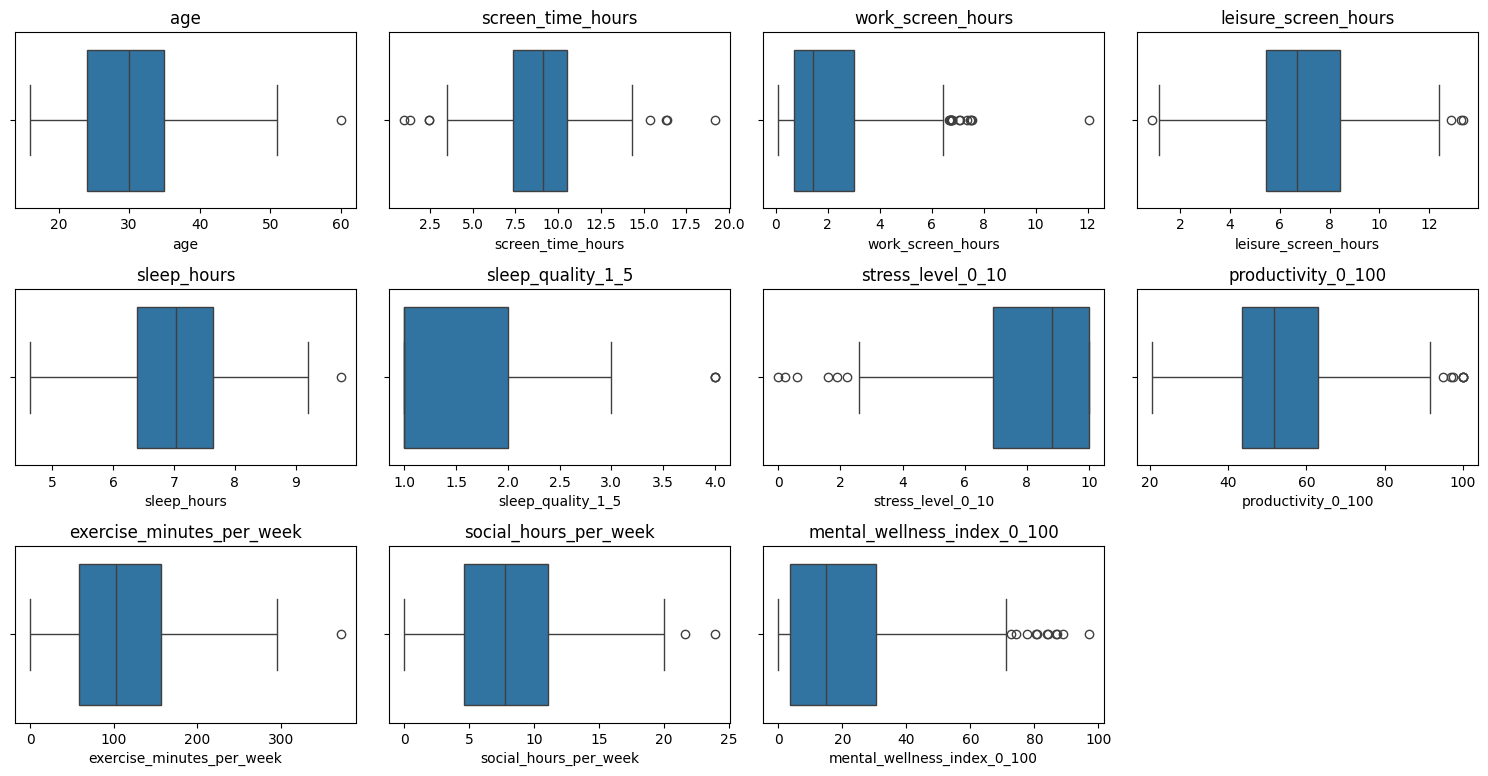

In [71]:
# Selecionando colunas numéricas
colunas_numericas = base.select_dtypes(include=np.number).columns

# Criando boxplots para cada coluna numérica
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=base[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()

## Análise dos boxplots

- **age:** O boxplot da variável idade revela um dado atípico, mas, por ser uma variável de grande relevância para a saúde mental, optei por mantê-la para aprofundar a análise quando necessário.

- **screen_time_hours e work_screen_hours:** Ambos os gráficos indicam a presença de uso de tela extremamente elevados. Esses dados atípicos, no entanto, são considerados cruciais para a análise, pois podem evidenciar o abuso de telas, um fator central para o projeto.

- **leisure_screen_hours:** A coluna tem um padrão mais concentrado e com menos dispersão. Apesar disso, a média de tempo de uso para lazer é superior à de trabalho, o que aponta para um comportamento relevante a ser investigado..

- **sleep_hours:** O boxplot revela uma distribuição mais equilibrada, com outliers pontuais. O gráfico, por si só, já aponta que essa variável provavelmente não precisará de tratamento adicional futuro.

- **sleep_quality_1_5:** Sendo uma escala pequena (1 a 5), o boxplot mostra a concentração nos valores mais baixos (qualidade 1 e 2). Não há outliers no sentido tradicional, mas sim a representação da distribuição dos dados nesta escala.

- **stress_level_0_10:** O gráfico mostra que a maioria das pessoas tem um nível de estresse alto, representado pelos valores entre os valores 6 e 10. Os outliers, das pessoas com um nível de estresse muito baixo, o que torna o gráfico assimétrico.

- **productivity_0_100:** Similar ao nível de estresse, a produtividade parece concentrada em certos valores, com alguns outliers em ambas as extremidades, sendo necessário uma análise posterior.

- **exercise_minutes_per_week:** O boxplot mostra claramente que existem alguns indivíduos com um volume de exercício muito acima da média. Isso indica que, para um estudo aprofundado, é crucial entender quem são essas pessoas e por que elas se exercitam tanto e como isso afeta em outros fatores.

- **social_hours_per_week:** Apresenta outliers superiores, sugerindo pessoas com muitas horas de interação social.

- **mental_wellness_index_0_100:** O boxplot apresenta que, embora a maioria das pessoas na sua amostra tenha um bem-estar mental baixo, existem outliers superiores, que indicam um grupo de indivíduos com um bem-estar consideravelmente mais alto. Essa disparidade é um ponto-chave da análise do projeto, mas que passará por uma suavização para evitar overfitting no momento de utilizar modelos de machine learning.

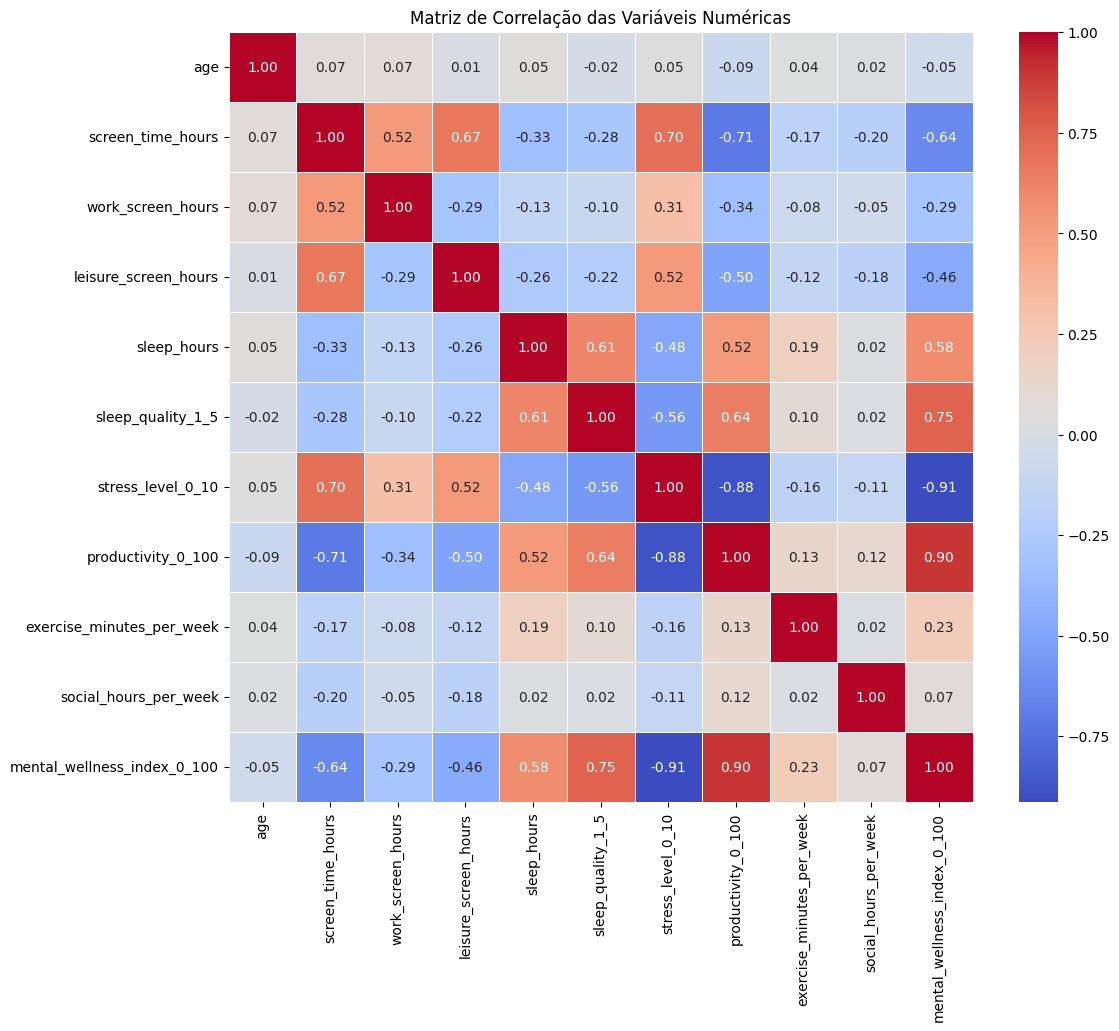

In [72]:
# Calculando a matriz de correlação
matriz_correlacao = base[colunas_numericas].corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Análise do Heatmap

**Correlação Negativa**

Nível de Estresse (-0.91): Essa é a ligação mais forte e oposta. Isso confirma que quanto mais estresse, menor é o bem-estar mental.

Tempo de Tela (entre -0.29 e -0.64): O tempo de tela, seja para lazer ou trabalho, tem uma ligação negativa com o bem-estar mental. Quanto mais tempo de tela, menor o bem-estar. O tempo total de tela (screen_time_hours) mostra o impacto mais significativo.

**Correlação Positiva**

Produtividade (0.90): Há uma ligação muito forte e direta entre produtividade e bem-estar mental. Ou seja, pessoas com maior bem-estar mental tendem a ser mais produtivas, e vice-versa.

Qualidade e Horas de Sono (0.75 e 0.58): A qualidade e a quantidade de sono também estão diretamente ligadas ao bem-estar mental. Quem dorme mais e melhor, tende a ter um bem-estar mental mais alto.

**Correlações Fracas**

Idade, Exercício e Socialização: Variáveis como idade, tempo de exercício e horas de socialização não mostram uma ligação linear forte com o bem-estar mental nesta amostra.

# Exploração de Relações Específicas

Foco no que foi observado nos bloxpots por apresentarem outliers ou problemas de distribuição

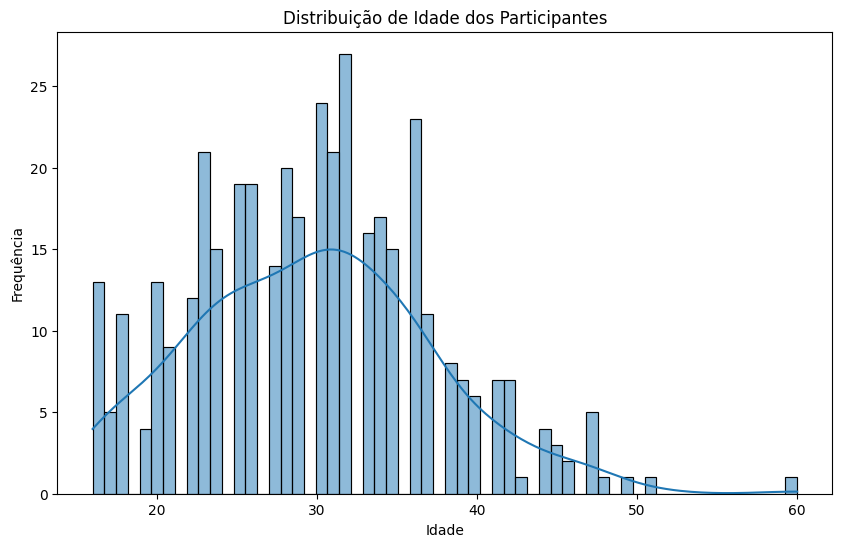

In [73]:
# Gráfico 01 - Distribuição de Idade

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='age', kde=True, bins=60)
plt.title('Distribuição de Idade dos Participantes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

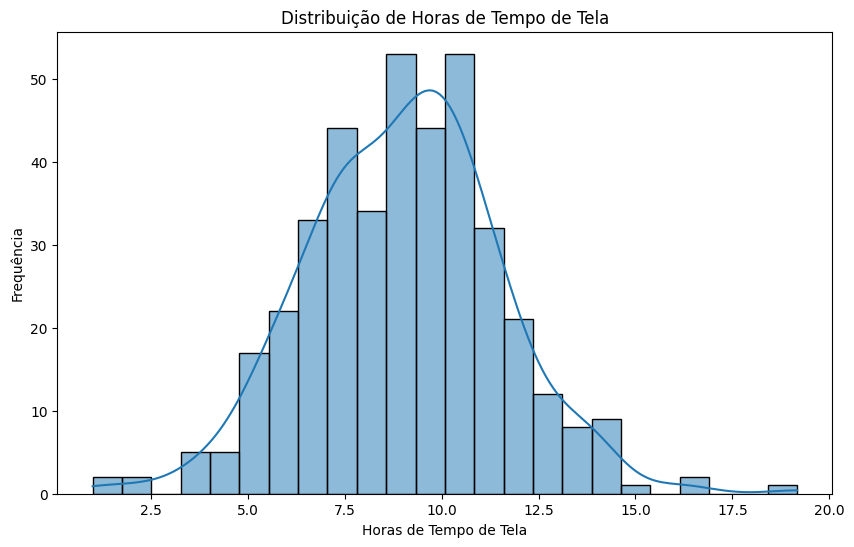

In [74]:
# Gráfico 02 - Distribuição de Tempo de Tela

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='screen_time_hours', kde=True, bins=24)
plt.title('Distribuição de Horas de Tempo de Tela')
plt.xlabel('Horas de Tempo de Tela')
plt.ylabel('Frequência')
plt.show()

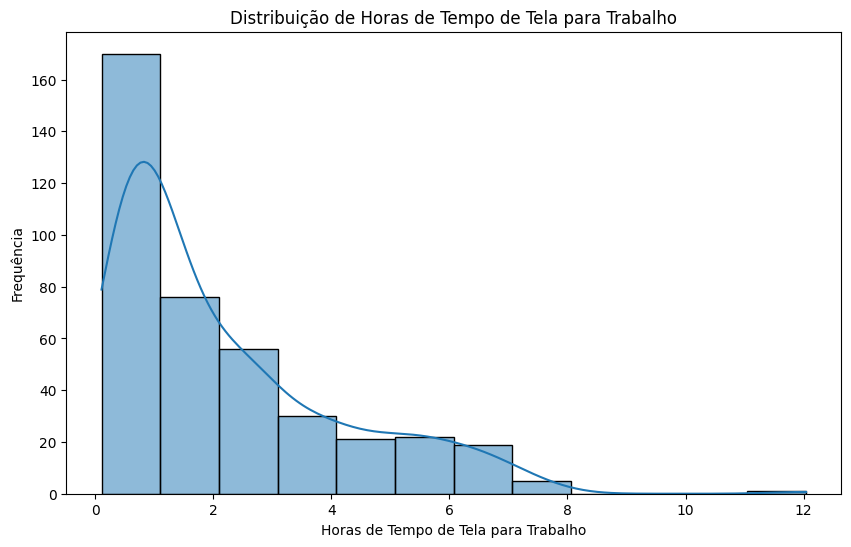

In [75]:
# Gráfico 03 - Distribuição de Tempo de Tela para Trabalho

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='work_screen_hours', kde=True, bins=12)
plt.title('Distribuição de Horas de Tempo de Tela para Trabalho')
plt.xlabel('Horas de Tempo de Tela para Trabalho')
plt.ylabel('Frequência')
plt.show()

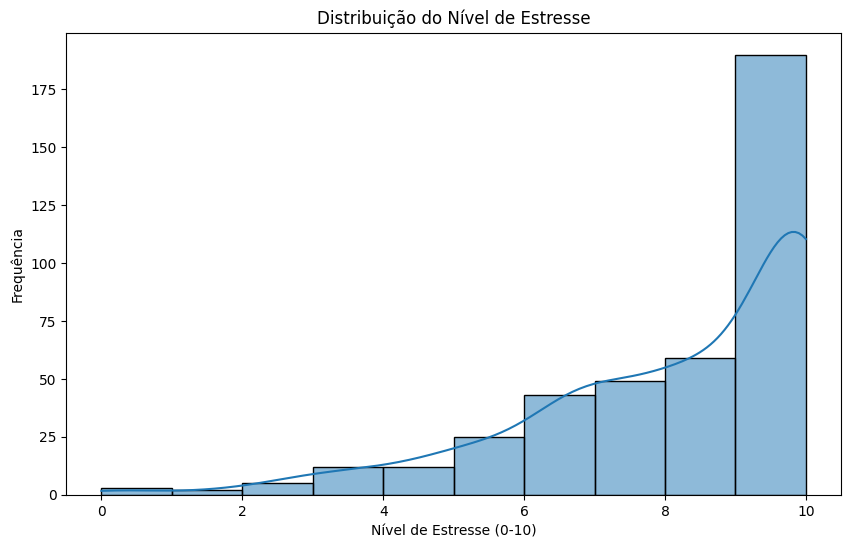

In [76]:
# Gráfico 04 - Distribuição de Nível de Estresse

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='stress_level_0_10', kde=True, bins=10)
plt.title('Distribuição do Nível de Estresse')
plt.xlabel('Nível de Estresse (0-10)')
plt.ylabel('Frequência')
plt.show()

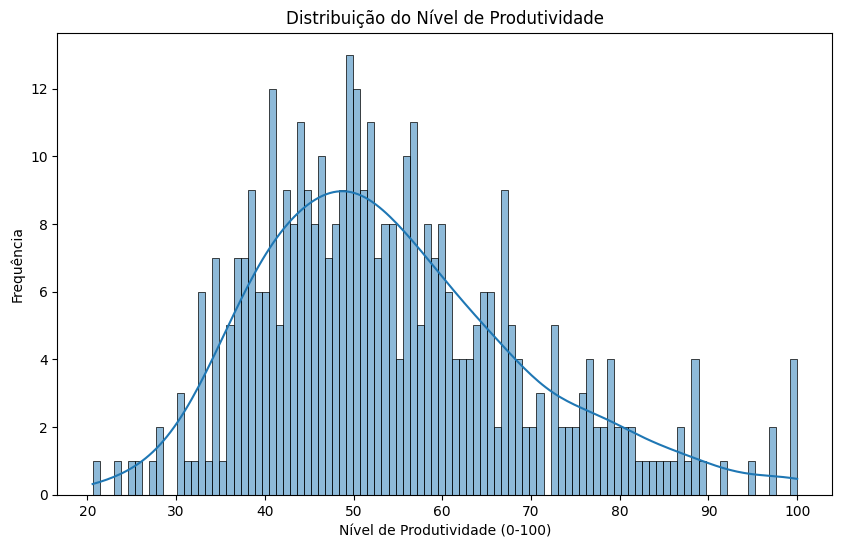

In [77]:
# Gráfico 05 - Distribuição de Nível de Produtividade

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='productivity_0_100', kde=True, bins=100)
plt.title('Distribuição do Nível de Produtividade')
plt.xlabel('Nível de Produtividade (0-100)')
plt.ylabel('Frequência')
plt.show()

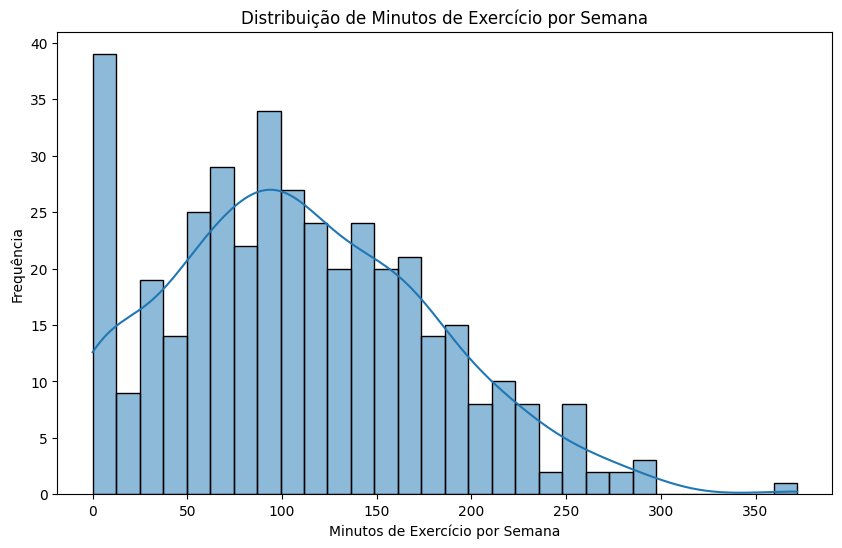

In [78]:
# Gráfico 06 - Distribuição de Minutos de Exercício por Semana

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='exercise_minutes_per_week', kde=True, bins=30)
plt.title('Distribuição de Minutos de Exercício por Semana')
plt.xlabel('Minutos de Exercício por Semana')
plt.ylabel('Frequência')
plt.show()

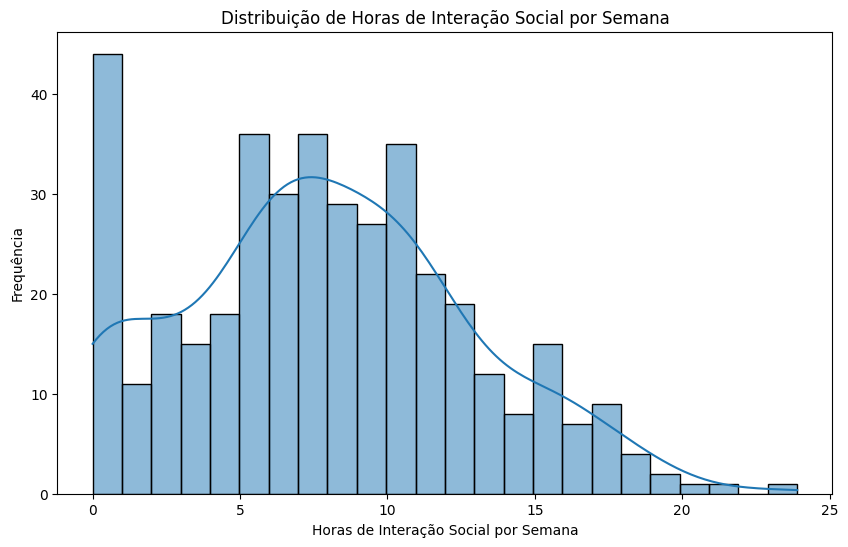

In [79]:
# Gráfico 07 - Horas de Interação Social por Semana

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='social_hours_per_week', kde=True, bins=24)
plt.title('Distribuição de Horas de Interação Social por Semana')
plt.xlabel('Horas de Interação Social por Semana')
plt.ylabel('Frequência')
plt.show()

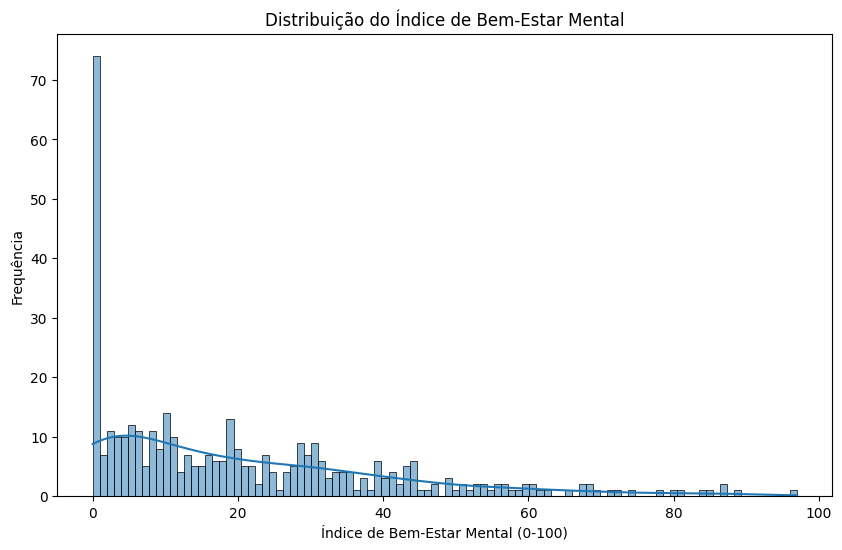

In [80]:
# Gráfico 08 - Distribuição de Índice de Bem-Estar Mental

plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='mental_wellness_index_0_100', kde=True, bins=100)
plt.title('Distribuição do Índice de Bem-Estar Mental')
plt.xlabel('Índice de Bem-Estar Mental (0-100)')
plt.ylabel('Frequência')
plt.show()

**Observações:**

Apesar da presença de valores mais altos (outliers) em algumas colunas, como as de tempo de tela e índice de bem-estar mental, a análise exploratória inicial não indica a necessidade imediata de modificar ou remover esses dados.

Esses valores extremos são, na verdade, essenciais para investigar a relação entre o uso excessivo de tela e o bem-estar mental, foco central deste projeto.

No entanto, é importante notar que na etapa posterior de preparação dos dados para modelos de Machine Learning, a assimetria e a concentração dos dados do índice de bem-estar mental (variável alvo) podem exigir técnicas de suavização ou transformação para otimizar o desempenho do modelo e evitar, principalmente, o overfitting.

# Análise das Variáveis Categóricas

/tmp/ipython-input-459856977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=base, x='gender', palette='pastel')


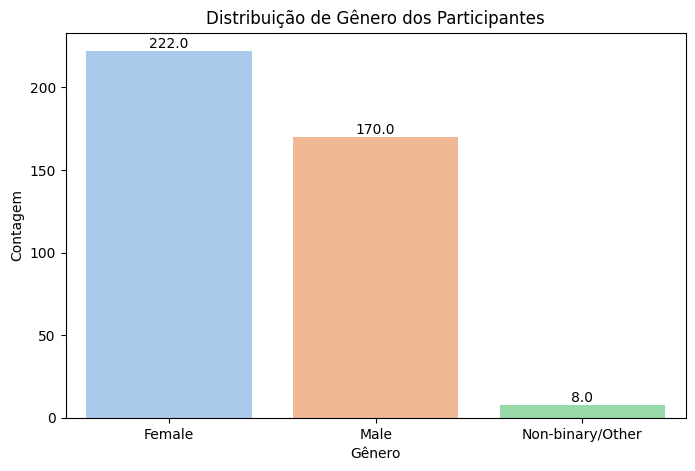

In [81]:
# Gráfico 01 - Distribuição de Gênero
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=base, x='gender', palette='pastel')
plt.title('Distribuição de Gênero dos Participantes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Adicionar os números brutos acima de cada categoria
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-1904901662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=base, x='occupation', palette='viridis')


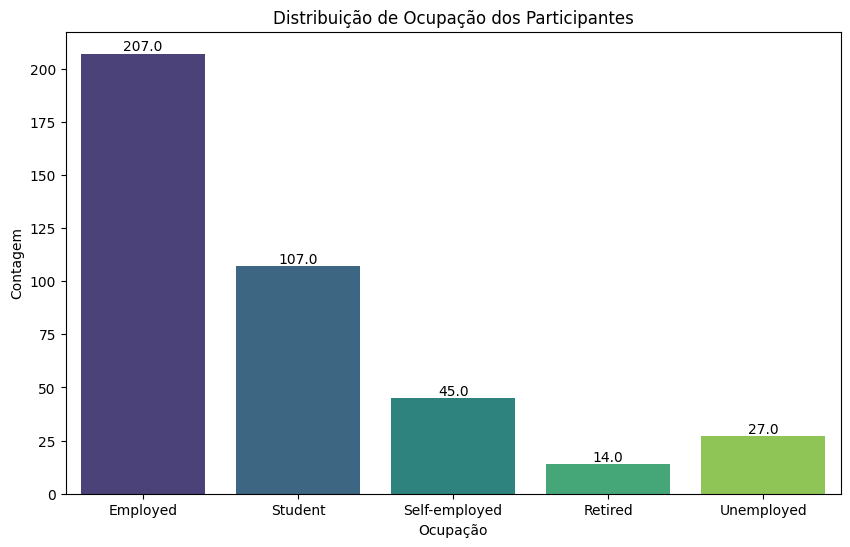

In [82]:
# Gráfico 02 - Distribuição por Ocupação
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=base, x='occupation', palette='viridis')
plt.title('Distribuição de Ocupação dos Participantes')
plt.xlabel('Ocupação')
plt.ylabel('Contagem')

# Adicionar os números brutos acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/tmp/ipython-input-2492685146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=base, x='work_mode', palette='viridis')


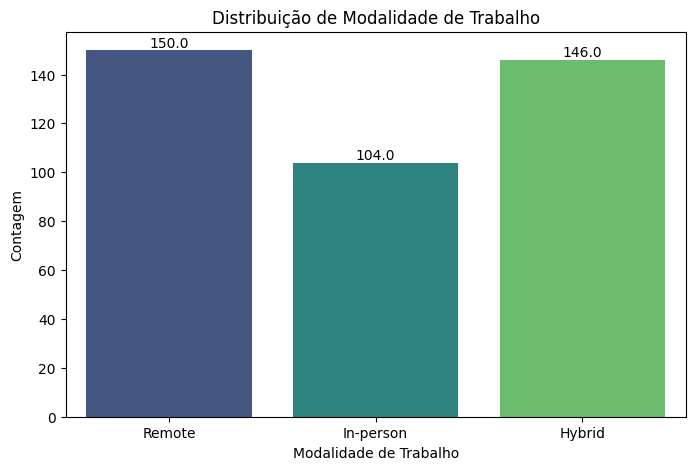

In [83]:
# Gráfico de Barras para Modalidade de Trabalho
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=base, x='work_mode', palette='viridis')
plt.title('Distribuição de Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Contagem')

# Adicionar os números brutos acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Observação sobre Modalidade de Trabalho e Ocupação:**

A coluna modalidade de trabalho tem 400 respostas. Os valores únicos não incluem uma categoria para quem não trabalha. Isso indica que a pergunta sobre modalidade de trabalho pode ter sido respondida por outros grupos ou até mesmo por pessoas desempregadas.

# Relação entre Variáveis Categóricas e Numéricas

Para a análise da variável **gênero**, aprofundamos a investigação nas colunas que apresentaram a maior correlação com o bem-estar mental. O objetivo é identificar se existem diferenças significativas no comportamento desses grupos.



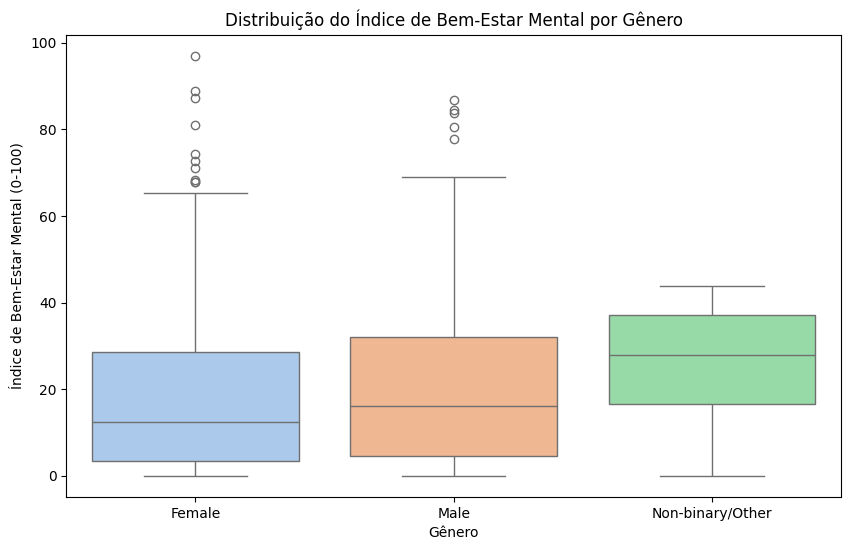

In [84]:
# Gráfico 01 - Relação entre Gênero e Índice de Bem-Estar Mental

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='gender', y='mental_wellness_index_0_100', palette='pastel', hue='gender', legend=False) # Adicionado hue e legend=False
plt.title('Distribuição do Índice de Bem-Estar Mental por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Índice de Bem-Estar Mental (0-100)')
plt.show()

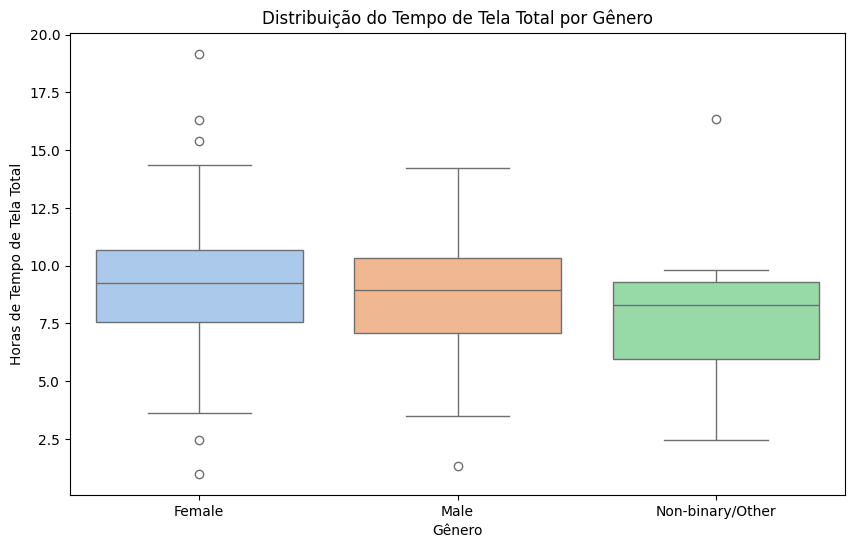

In [85]:
# Gráfico 02 - Relação entre Gênero e Tempo de Tela Total

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='gender', y='screen_time_hours', palette='pastel', hue='gender', legend=False)
plt.title('Distribuição do Tempo de Tela Total por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Horas de Tempo de Tela Total')
plt.show()

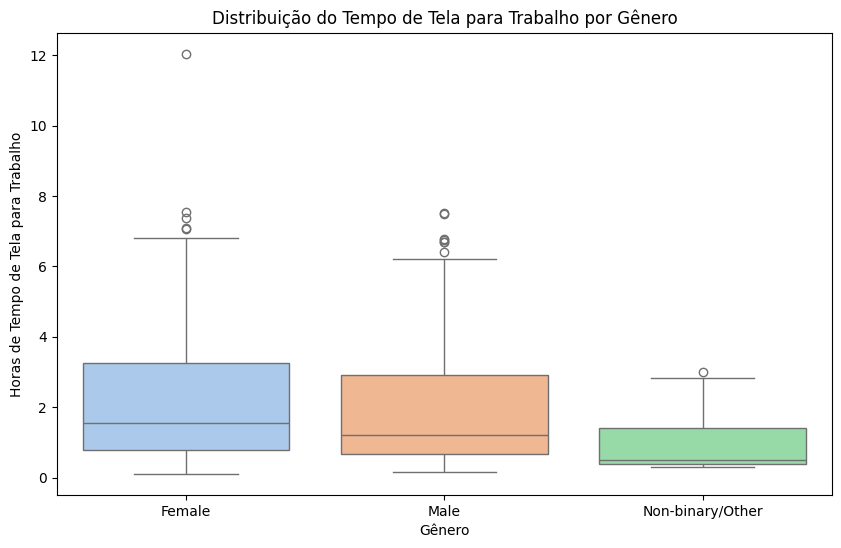

In [86]:
# Gráfico 03 - Relação entre Gênero e Tempo de Tela para Trabalho

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='gender', y='work_screen_hours', palette='pastel', hue='gender', legend=False)
plt.title('Distribuição do Tempo de Tela para Trabalho por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Horas de Tempo de Tela para Trabalho')
plt.show()

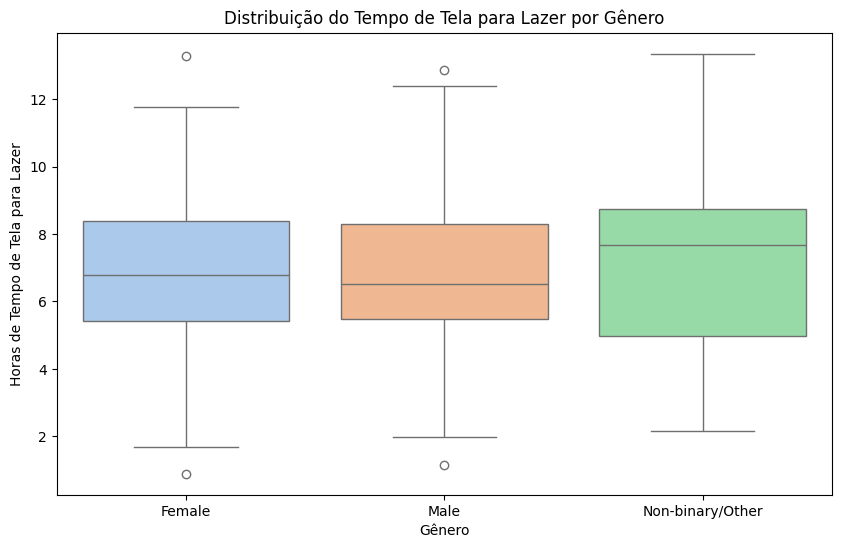

In [87]:
# Gráfico 04 - Relação entre Gênero e Tempo de Tela para Lazer

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='gender', y='leisure_screen_hours', palette='pastel', hue='gender', legend=False)
plt.title('Distribuição do Tempo de Tela para Lazer por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Horas de Tempo de Tela para Lazer')
plt.show()

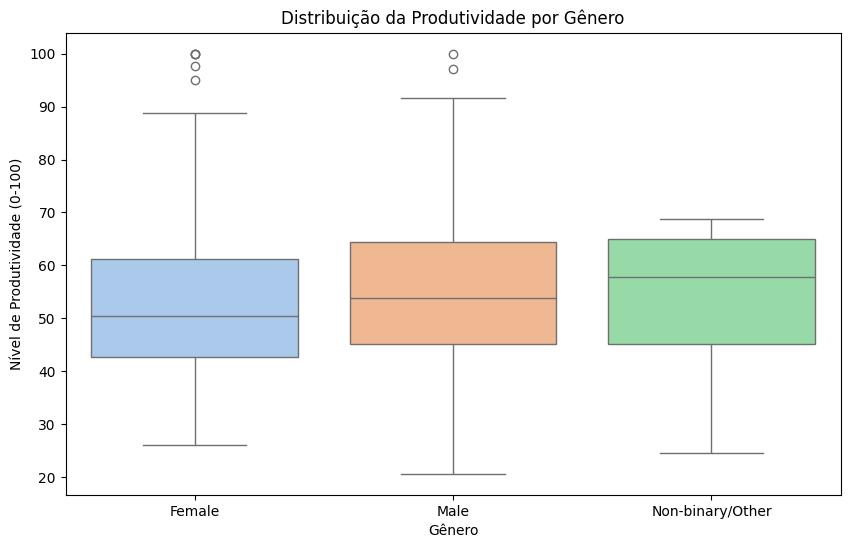

In [88]:
# Gráfico 05 - Relação entre Gênero e Produtividade

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='gender', y='productivity_0_100', palette='pastel', hue='gender', legend=False)
plt.title('Distribuição da Produtividade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nível de Produtividade (0-100)')
plt.show()

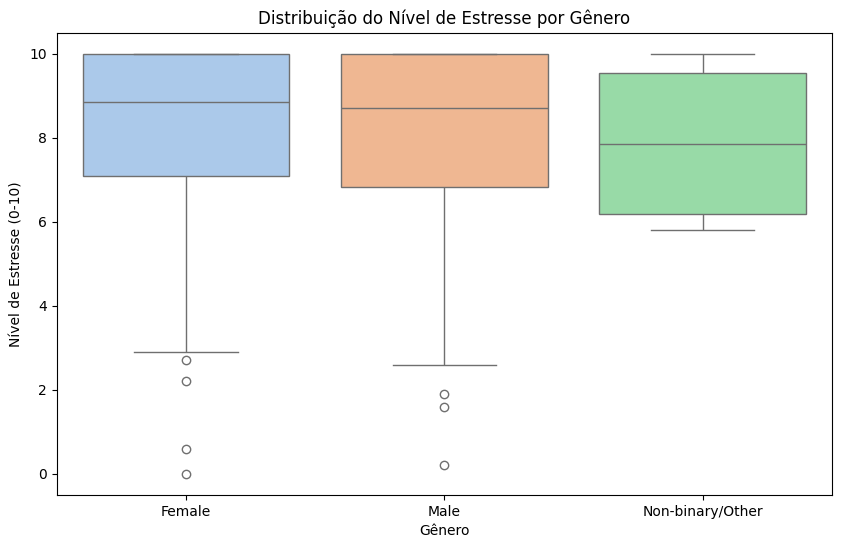

In [89]:
# Gráfico 06 - Relação entre Gênero e Nível de Estresse

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='gender', y='stress_level_0_10', palette='pastel', hue='gender', legend=False)
plt.title('Distribuição do Nível de Estresse por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nível de Estresse (0-10)')
plt.show()

### Insights obtidos através das correlações do gênero:

**Bem-Estar Mental**: As mulheres na amostra tendem a apresentar um bem-estar mental ligeiramente menor, com uma mediana mais baixa e maior variabilidade em comparação com os homens. O grupo Não Binário/Outro, apesar do menor volume de dados, mostra uma mediana mais alta, mas com grande dispersão.

**Tempo de Tela**: As distribuições de tempo de tela (total, para trabalho e lazer) são relativamente semelhantes entre os gêneros. As medianas e a concentração de dados são próximas para os principais grupos (Mulher e Homem).

**Produtividade**: A distribuição de produtividade é similar entre os gêneros em termos de tendência central e dispersão.

**Nível de Estresse**: Mulheres e homens na amostra mostram níveis de estresse semelhantes, com as distribuições concentradas em patamares mais altos.

Em resumo, a variável gênero parece ter um impacto mais perceptível na distribuição do bem-estar mental, enquanto para as demais variáveis a similaridade entre os grupos é mais evidente.

Para a análise da variável **ocupação**, aprofundamos a investigação nas colunas que apresentaram a maior correlação com o bem-estar mental. O objetivo é identificar se existem diferenças significativas no comportamento desses grupos.

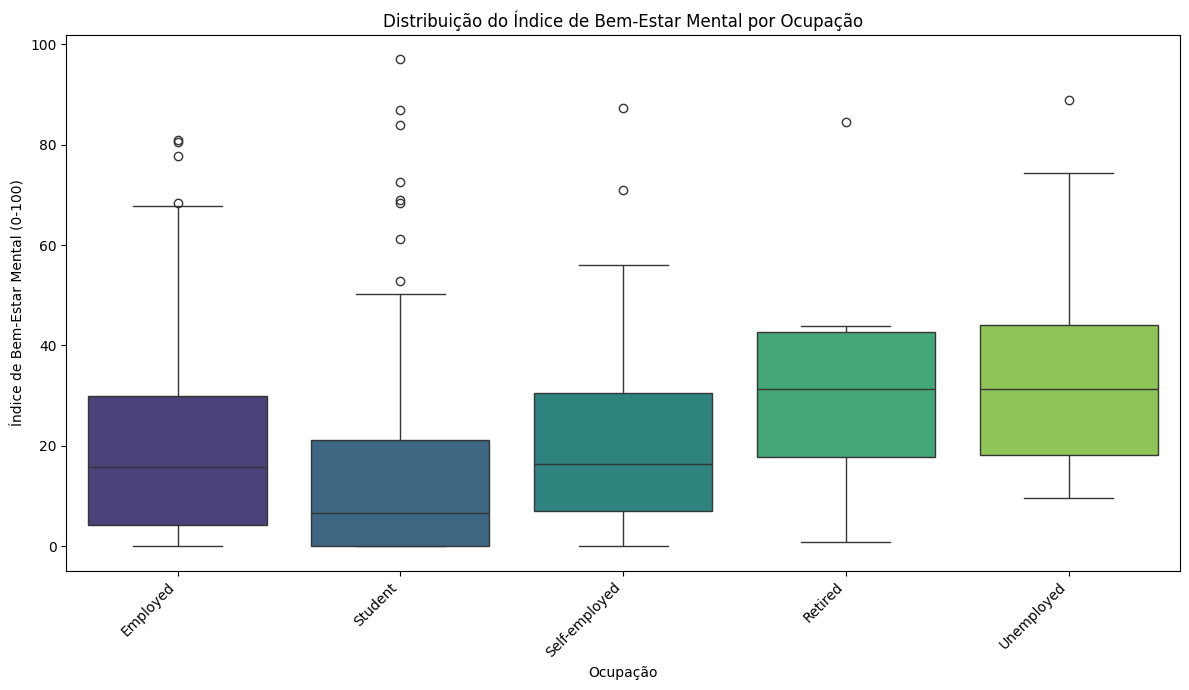

In [90]:
# Gráfico 01 - Relação entre Ocupação e Índice de Bem-Estar Mental

plt.figure(figsize=(12, 7)) # Ajustando o tamanho para acomodar mais categorias
sns.boxplot(data=base, x='occupation', y='mental_wellness_index_0_100', palette='viridis', hue='occupation', legend=False)
plt.title('Distribuição do Índice de Bem-Estar Mental por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Índice de Bem-Estar Mental (0-100)')
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

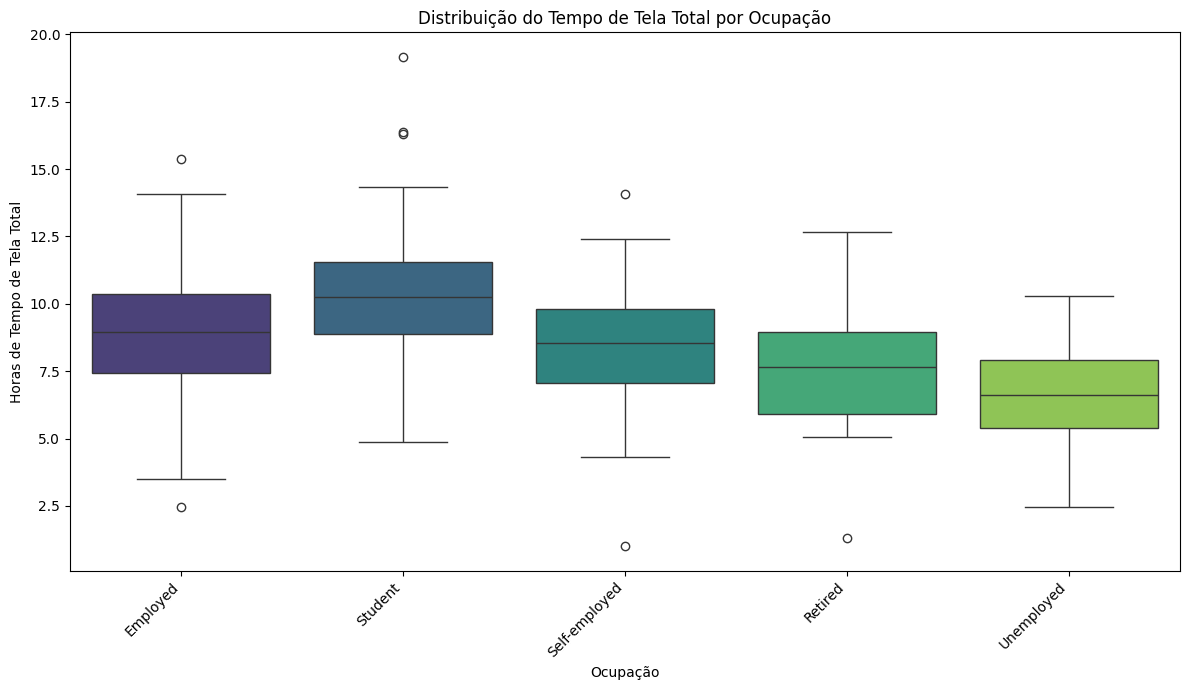

In [91]:
# Gráfico 02 - Relação entre Ocupação e Tempo de Tela Total

plt.figure(figsize=(12, 7))
sns.boxplot(data=base, x='occupation', y='screen_time_hours', palette='viridis', hue='occupation', legend=False)
plt.title('Distribuição do Tempo de Tela Total por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Horas de Tempo de Tela Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

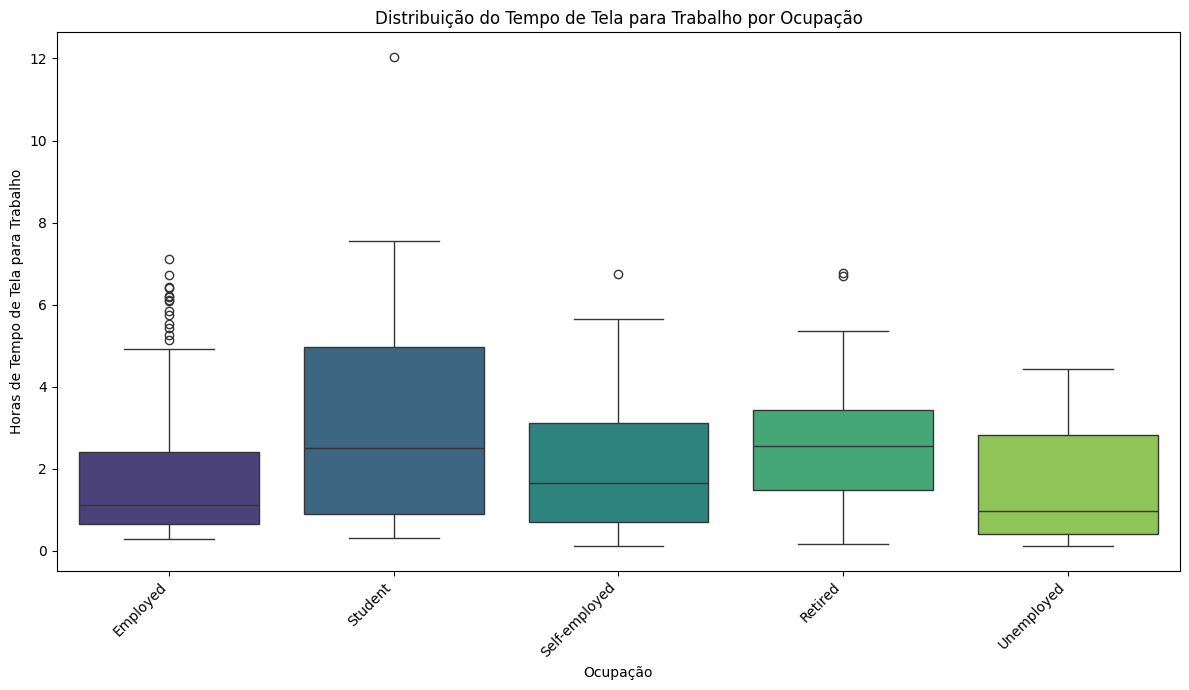

In [92]:
# Gráfico 03 - Relação entre Ocupação e Tempo de Tela para Trabalho

plt.figure(figsize=(12, 7))
sns.boxplot(data=base, x='occupation', y='work_screen_hours', palette='viridis', hue='occupation', legend=False)
plt.title('Distribuição do Tempo de Tela para Trabalho por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Horas de Tempo de Tela para Trabalho')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

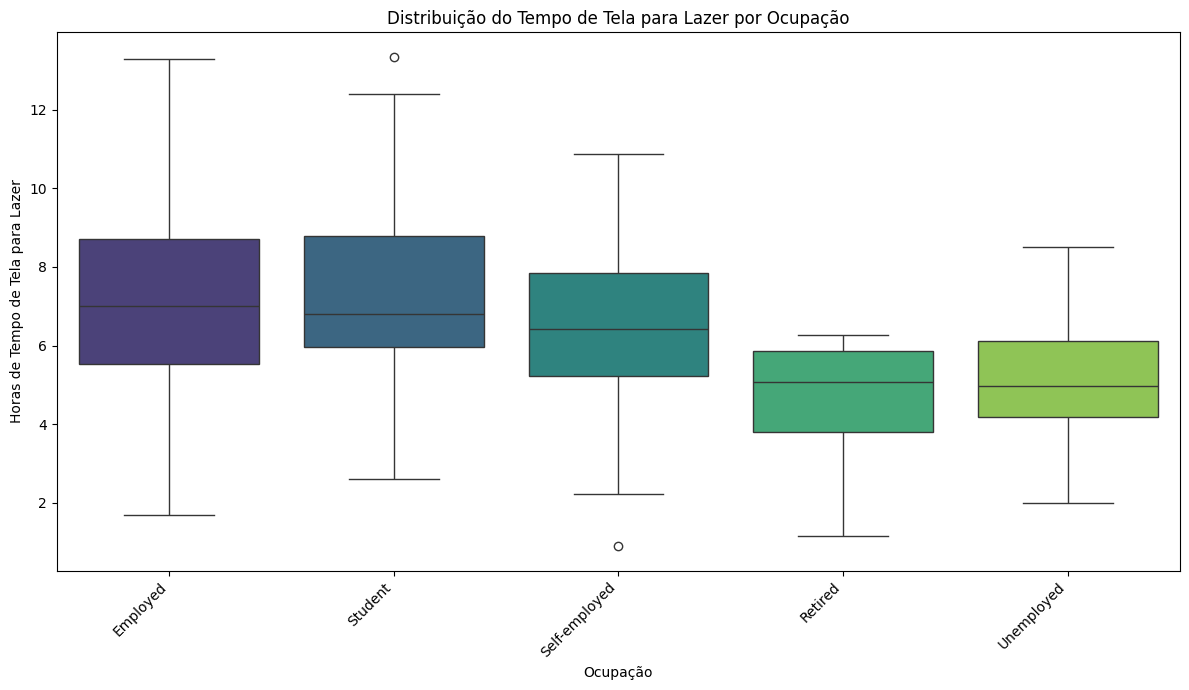

In [93]:
# Gráfico 04 - Relação entre Ocupação e Tempo de Tela para Lazer

plt.figure(figsize=(12, 7))
sns.boxplot(data=base, x='occupation', y='leisure_screen_hours', palette='viridis', hue='occupation', legend=False)
plt.title('Distribuição do Tempo de Tela para Lazer por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Horas de Tempo de Tela para Lazer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

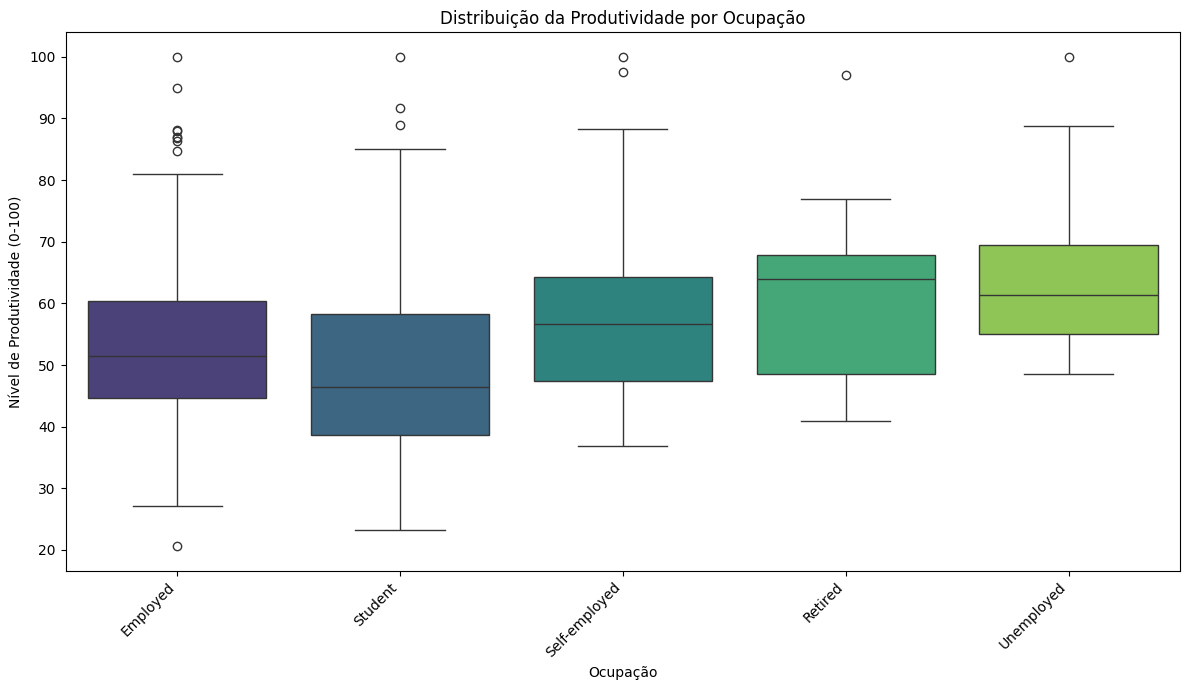

In [94]:
# Gráfico 05 - Relação entre Ocupação e Produtividade

plt.figure(figsize=(12, 7))
sns.boxplot(data=base, x='occupation', y='productivity_0_100', palette='viridis', hue='occupation', legend=False)
plt.title('Distribuição da Produtividade por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Nível de Produtividade (0-100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

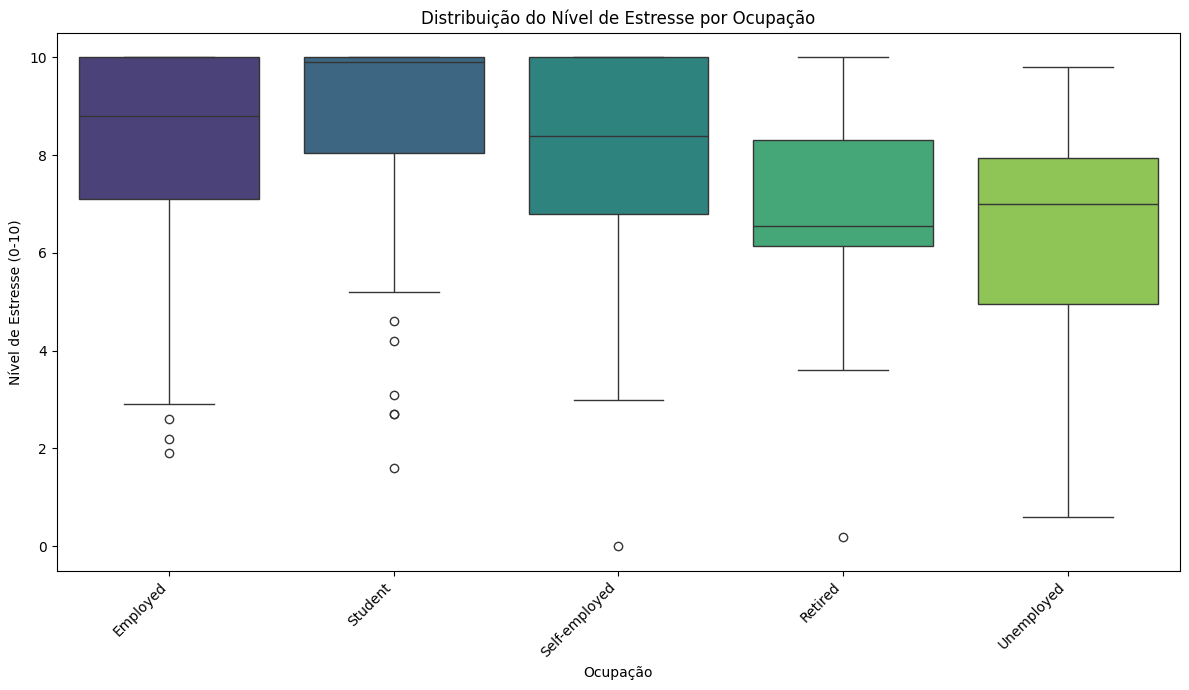

In [95]:
# Gráfico 06 - Relação entre Ocupação e Nível de Estresse

plt.figure(figsize=(12, 7))
sns.boxplot(data=base, x='occupation', y='stress_level_0_10', palette='viridis', hue='occupation', legend=False)
plt.title('Distribuição do Nível de Estresse por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Nível de Estresse (0-10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights obtidos através das correlações da ocupação:

A análise dos boxplots que relacionam a ocupação com as variáveis numéricas revela padrões distintos entre os grupos:

**Índice de Bem-Estar Mental**: O grupo de Aposentados e Desempregados se destaca com as medianas mais altas para o bem-estar mental. Em contrapartida, os grupos de Estudantes e Empregados tendem a ter as medianas mais baixas, indicando um bem-estar potencialmente menor.

**Tempo de Tela Total**: O grupo de Estudantes apresenta a mediana mais alta. O segundo grupo com a mediana mais alta é o de Empregados. Os grupos de Autônomos e Aposentados tendem a ter as medianas mais baixas e próximas, seguidos pelos Desempregados.

**Tempo de Tela para Trabalho**: Os grupos de Estudantes e Aposentados apresentam as medianas mais altas, seguidos de perto pelos Empregados e Autônomos. O grupo de Desempregados tem a mediana mais baixa, com a maior parte do tempo de tela para trabalho se concentrando próximo a zero.

**Tempo de Tela para Lazer**: O grupo de Estudantes apresenta a mediana mais alta. O segundo grupo com a mediana mais alta é o de Empregados, com a mediana por volta de 7 horas. Os grupos de Autônomos, Desempregados e Aposentados têm medianas em patamares mais baixos, variando de 4 a 6 horas.

**Produtividade**: A mediana mais alta é a do grupo de Desempregados. Em seguida, vêm os Aposentados. Os grupos de Empregados, Estudantes e Autônomos têm as medianas mais baixas e próximas, variando entre 40 e 50.

**Nível de Estresse**: Os grupos de Empregados, Estudantes e Autônomos tendem a apresentar medianas de estresse mais altas, com a maior parte de suas distribuições concentrada em níveis elevados. Aposentados e Desempregados contém medianas de estresse mais baixas, mas mesmo assim, em um valor que precisamos ficar de olho.

Em resumo, o grupo de Desempregados e de Aposentados consistentemente apresentam os resultados mais favoráveis, com a maior produtividade e os menores níveis de estresse. Por outro lado, os grupos de Empregados e Estudantes tendem a ter os níveis de estresse mais altos e uma produtividade mais baixa em comparação. Essas descobertas são cruciais para a análise, pois destacam o impacto da ocupação nas variáveis do projeto.

Para a análise da variável **Modalidade de Trabalho**, aprofundamos a investigação nas colunas que apresentaram a maior correlação com o bem-estar mental. O objetivo é identificar se existem diferenças significativas no comportamento desses grupos.

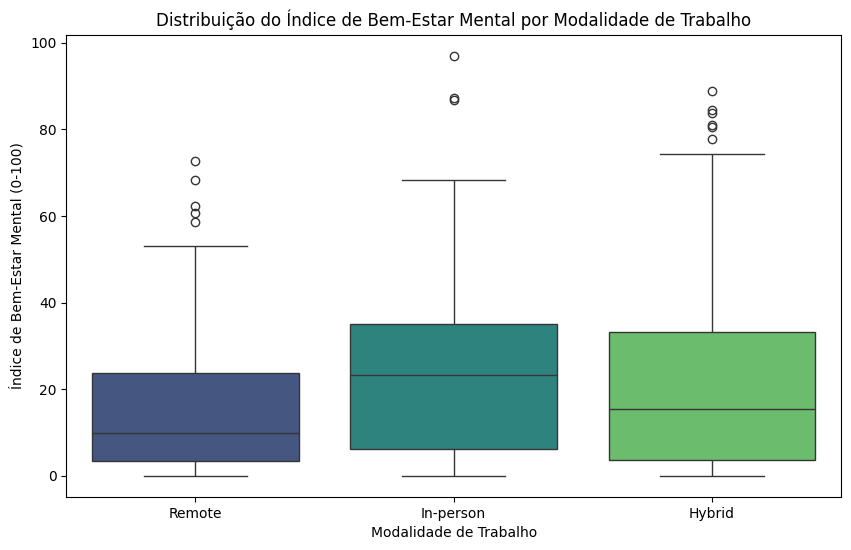

In [96]:
# Gráfico 01 - Relação entre Modalidade de Trabalho e Índice de Bem-Estar Mental

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='work_mode', y='mental_wellness_index_0_100', palette='viridis', hue='work_mode', legend=False)
plt.title('Distribuição do Índice de Bem-Estar Mental por Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Índice de Bem-Estar Mental (0-100)')
plt.show()

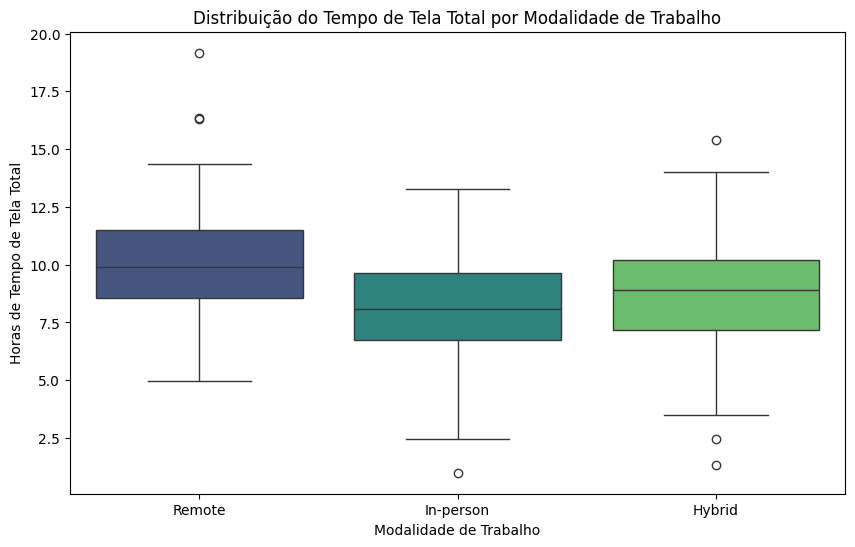

In [97]:
# Gráfico 02 - Relação entre Modalidade de Trabalho e Tempo de Tela Total

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='work_mode', y='screen_time_hours', palette='viridis', hue='work_mode', legend=False)
plt.title('Distribuição do Tempo de Tela Total por Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Horas de Tempo de Tela Total')
plt.show()

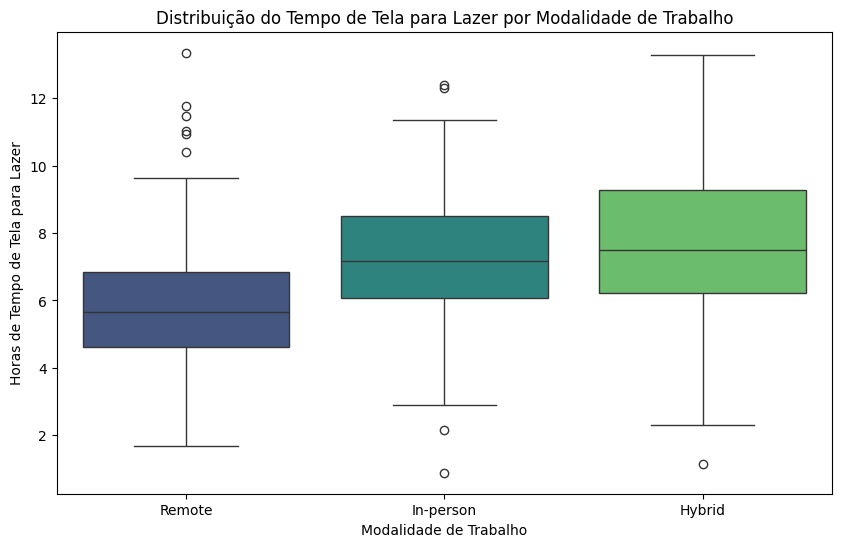

In [98]:
# Gráfico 03 - Relação entre Modalidade de Trabalho e Tempo de Tela para Lazer

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='work_mode', y='leisure_screen_hours', palette='viridis', hue='work_mode', legend=False)
plt.title('Distribuição do Tempo de Tela para Lazer por Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Horas de Tempo de Tela para Lazer')
plt.show()

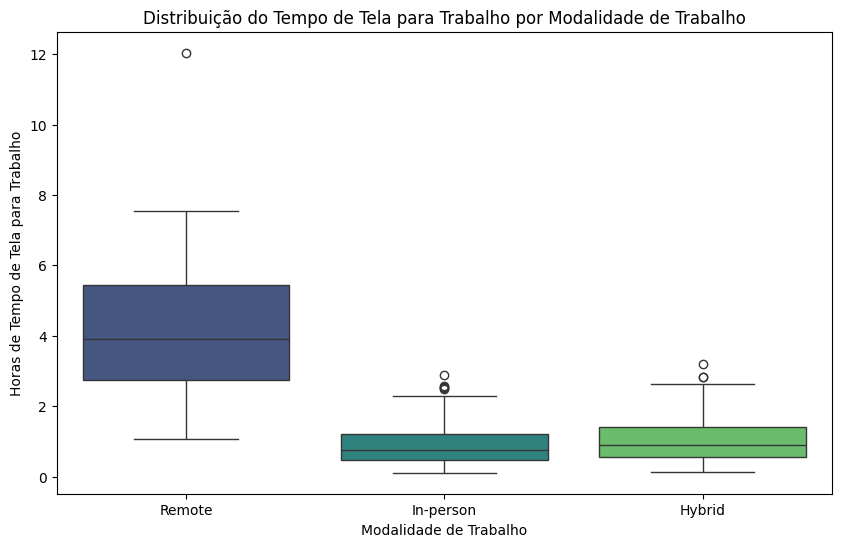

In [99]:
# Gráfico 06 - Relação entre Modalidade de Trabalho e Tempo de Tela para Trabalho

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='work_mode', y='work_screen_hours', palette='viridis', hue='work_mode', legend=False)
plt.title('Distribuição do Tempo de Tela para Trabalho por Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Horas de Tempo de Tela para Trabalho')
plt.show()

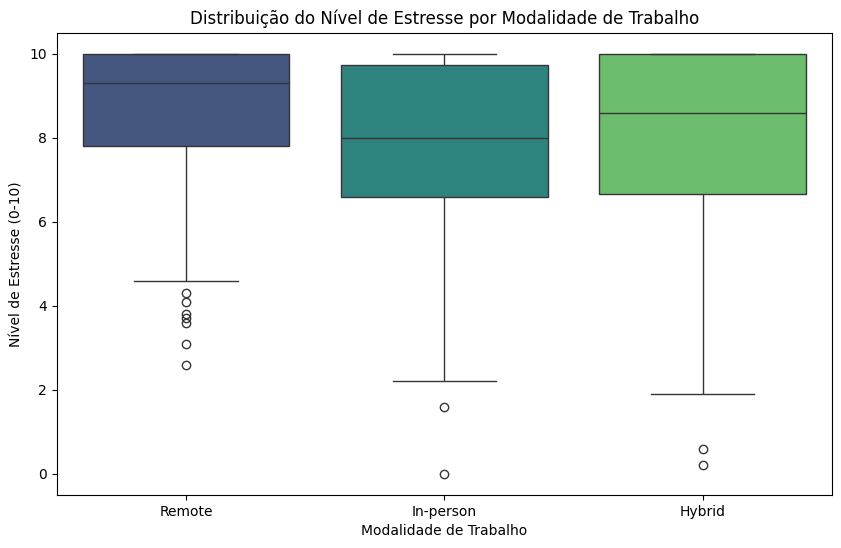

In [100]:
# Gráfico 04 - Relação entre Modalidade de Trabalho e Nível de Estresse

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='work_mode', y='stress_level_0_10', palette='viridis', hue='work_mode', legend=False)
plt.title('Distribuição do Nível de Estresse por Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Nível de Estresse (0-10)')
plt.show()

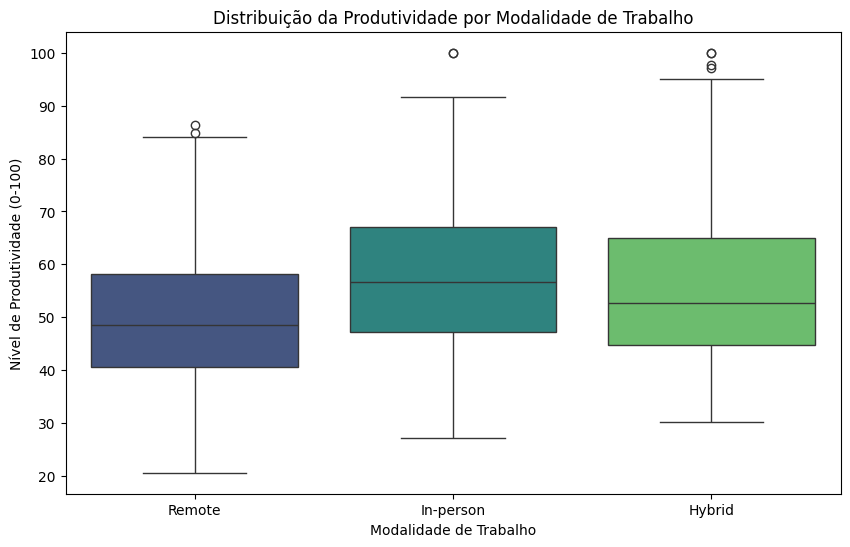

In [101]:
# Gráfico 05 - Relação entre Modalidade de Trabalho e Produtividade

plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='work_mode', y='productivity_0_100', palette='viridis', hue='work_mode', legend=False)
plt.title('Distribuição da Produtividade por Modalidade de Trabalho')
plt.xlabel('Modalidade de Trabalho')
plt.ylabel('Nível de Produtividade (0-100)')
plt.show()

### Insights obtidos através das correlações da modalidade:


**Índice de Bem-Estar Mental**: O grupo que trabalha Presencialmente tem a mediana mais alta. Os grupos com modalidades Remota e Híbrida têm medianas significativamente mais baixas e próximas, com a mediana do trabalho remoto sendo a mais baixa entre os três.

**Tempo de Tela Total**: O grupo de trabalho Remoto apresenta a mediana mais alta. As modalidades Presencial e Híbrida têm medianas significativamente mais baixas e próximas.

**Tempo de Tela para Lazer**: Os grupos de trabalho Presencial e Híbrido têm medianas de tempo de lazer mais altas e próximas. O grupo Remoto tem a mediana mais baixa para tempo de tela de lazer.

**Tempo de Tela para Trabalho**: O grupo que trabalha de forma Remota apresenta a mediana mais alta. Os grupos com modalidades de trabalho Presencial e Híbrida têm as medianas mais baixas e muito próximas.

**Produtividade**: A mediana de produtividade é mais alta para os Aposentados, o que pode refletir o foco em atividades pessoais e voluntárias. Empregados e Autônomos têm medianas intermediárias, enquanto Estudantes e Desempregados mostram as medianas mais baixas.

**Nível de Estresse**: O grupo com modalidade de trabalho Remoto apresenta a mediana de estresse mais alta. Os grupos Híbrido e Presencial tendem a ter as medianas de estresse mais baixas.

Em resumo, o grupo que trabalha Remotamente apresenta os maiores níveis de estresse e de tempo de tela total e para trabalho, mas o menor tempo de tela para lazer. Em contraste, o grupo de trabalho Presencial tem a mediana mais alta de bem-estar mental e os menores tempos de tela para trabalho.

### **Insights obtidos das análises das categorias**:

Ocupação e Bem-Estar: A ocupação tem um impacto significativo no bem-estar mental e nos hábitos de tempo de tela. Pessoas desempregadas e aposentadas tendem a ter maior produtividade e menor estresse. Por outro lado, estudantes e empregados enfrentam maior estresse e menor produtividade, além de maior tempo de tela.

Modalidade de Trabalho e Estresse: Trabalhadores remotos tendem a apresentar os níveis mais altos de estresse e o maior tempo de tela total. Em contraste, aqueles que trabalham presencialmente demonstram maior bem-estar mental.

Tempo de Tela vs. Lazer: Curiosamente, o maior tempo de tela total para trabalhadores remotos não se traduz em mais tempo de tela para lazer. Pelo contrário, as pessoas que trabalham de forma presencial e híbrida são as que dedicam mais tempo de tela ao lazer.

# Relação entre as Variáveis Numéricas

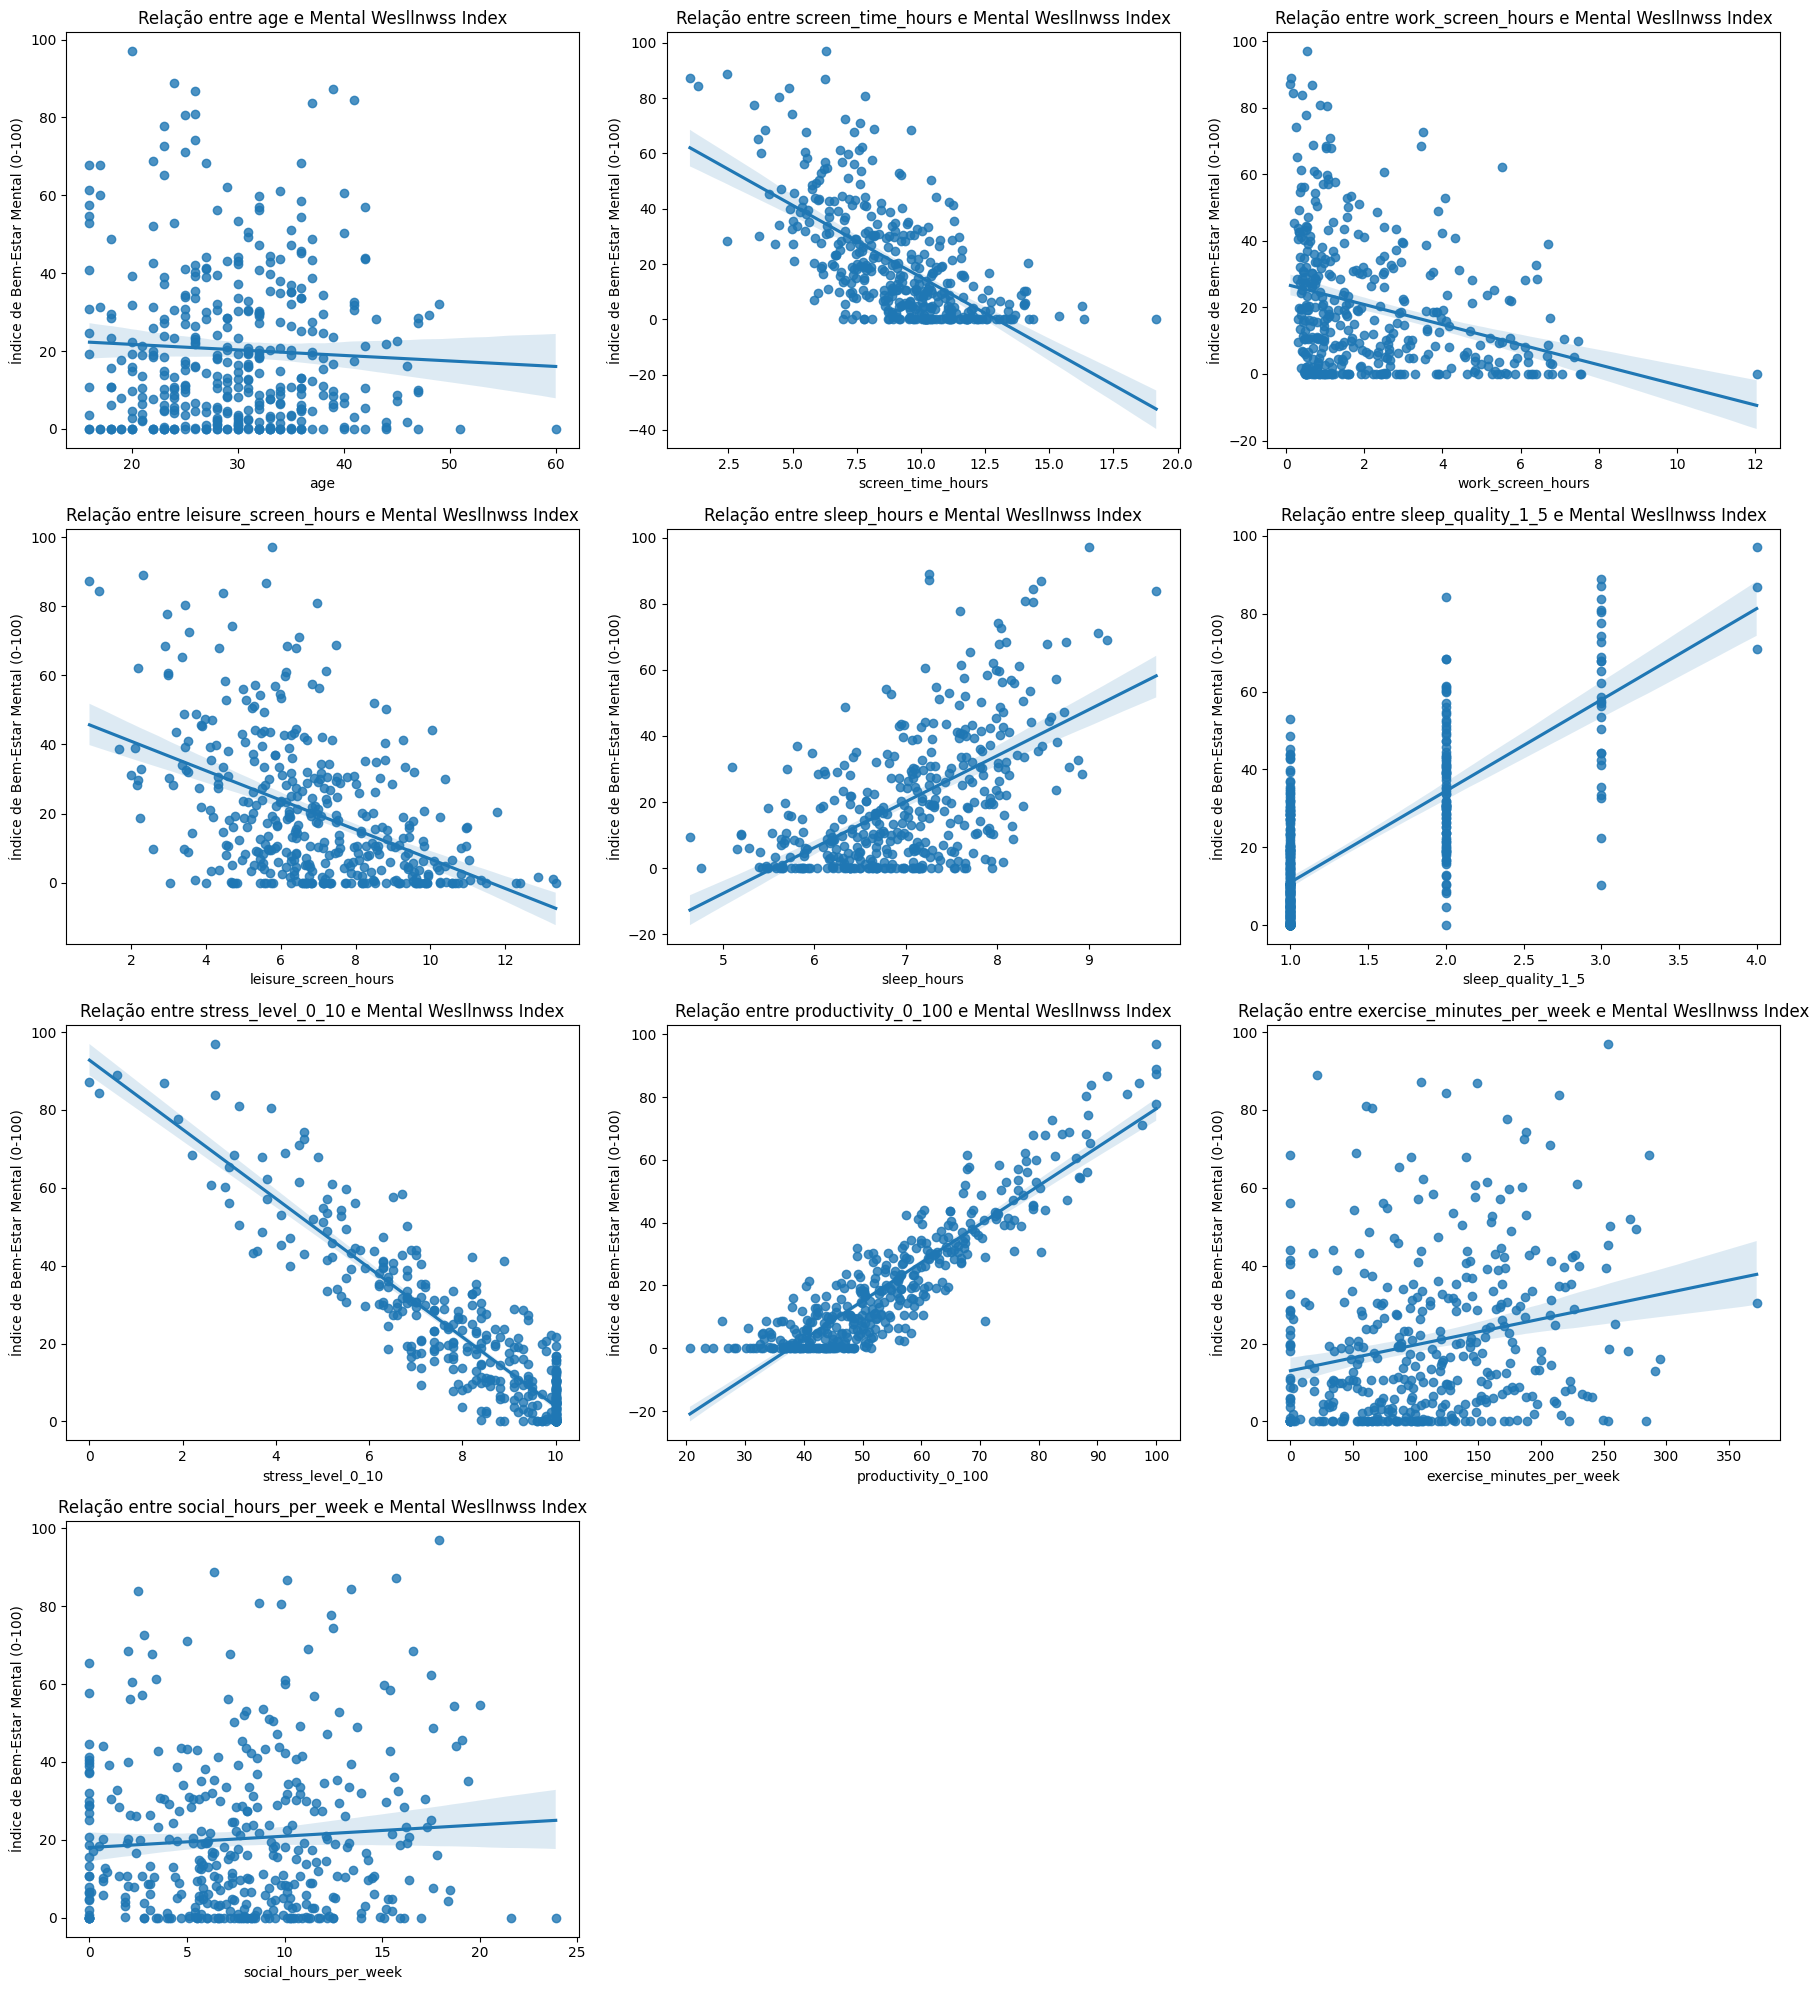

In [102]:
# Iniciando com a relação da coluna do Bem-Estar Mental e as outras variáveis númericas
# Selecionando colunas numéricas, excluindo o índice de bem-estar mental
colunas_numericas_para_correlacao = base.select_dtypes(include=np.number).columns.drop('mental_wellness_index_0_100')

# Definindo o número de linhas e colunas para os subplots
n_cols = 3  # Número de colunas por linha
n_rows = (len(colunas_numericas_para_correlacao) + n_cols - 1) // n_cols  # Calcula o número de linhas necessário

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Ajusta o tamanho da figura

for i, coluna in enumerate(colunas_numericas_para_correlacao):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(data=base, x=coluna, y='mental_wellness_index_0_100')
    plt.title(f'Relação entre {coluna} e Mental Wesllnwss Index')
    plt.xlabel(coluna)
    plt.ylabel('Índice de Bem-Estar Mental (0-100)')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

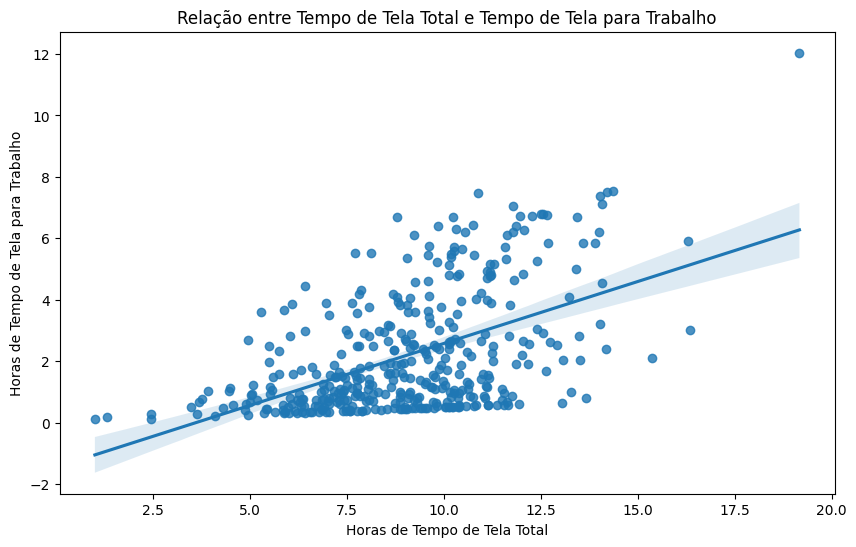

In [103]:
# Gráfico de dispersão: screen_time_hours vs. work_screen_hours
plt.figure(figsize=(10, 6))
sns.regplot(data=base, x='screen_time_hours', y='work_screen_hours')
plt.title('Relação entre Tempo de Tela Total e Tempo de Tela para Trabalho')
plt.xlabel('Horas de Tempo de Tela Total')
plt.ylabel('Horas de Tempo de Tela para Trabalho')
plt.show()

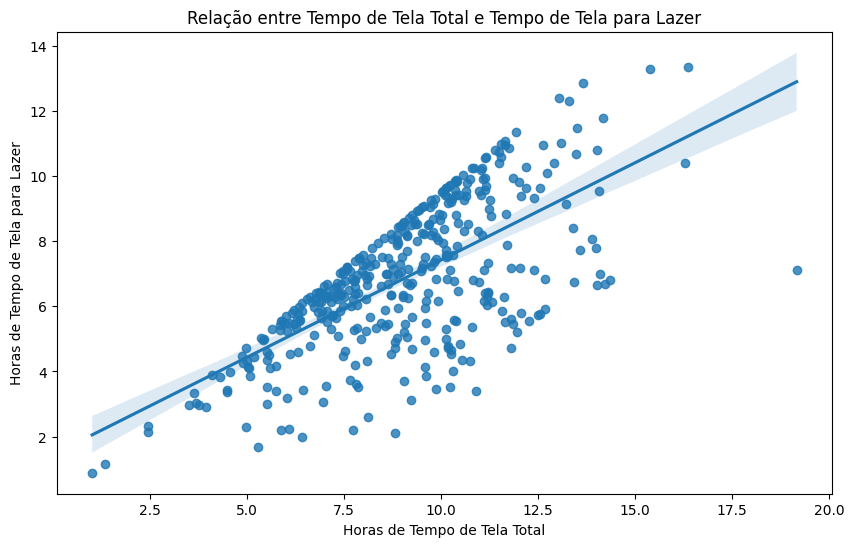

In [104]:
# Gráfico de dispersão: screen_time_hours vs. leisure_screen_hours
plt.figure(figsize=(10, 6))
sns.regplot(data=base, x='screen_time_hours', y='leisure_screen_hours')
plt.title('Relação entre Tempo de Tela Total e Tempo de Tela para Lazer')
plt.xlabel('Horas de Tempo de Tela Total')
plt.ylabel('Horas de Tempo de Tela para Lazer')
plt.show()

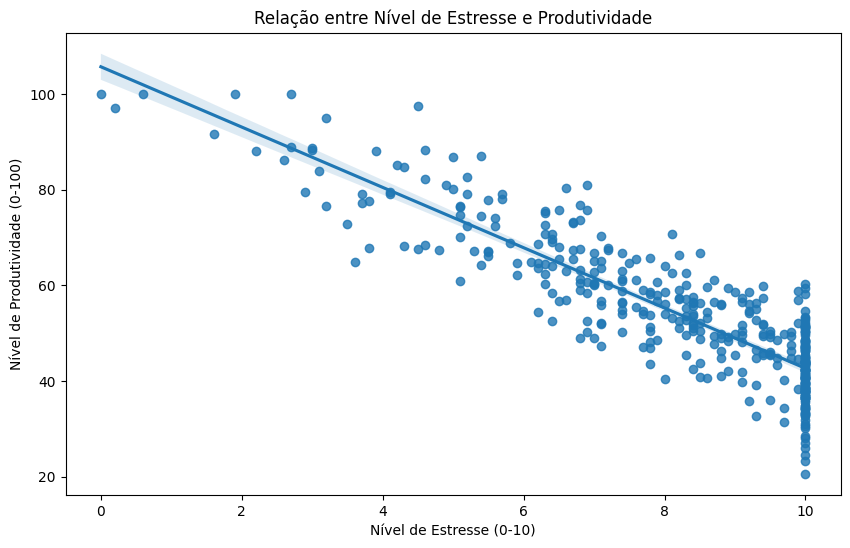

In [105]:
# Gráfico de dispersão: stress_level_0_10 vs. productivity_0_100
plt.figure(figsize=(10, 6))
sns.regplot(data=base, x='stress_level_0_10', y='productivity_0_100')
plt.title('Relação entre Nível de Estresse e Produtividade')
plt.xlabel('Nível de Estresse (0-10)')
plt.ylabel('Nível de Produtividade (0-100)')
plt.show()

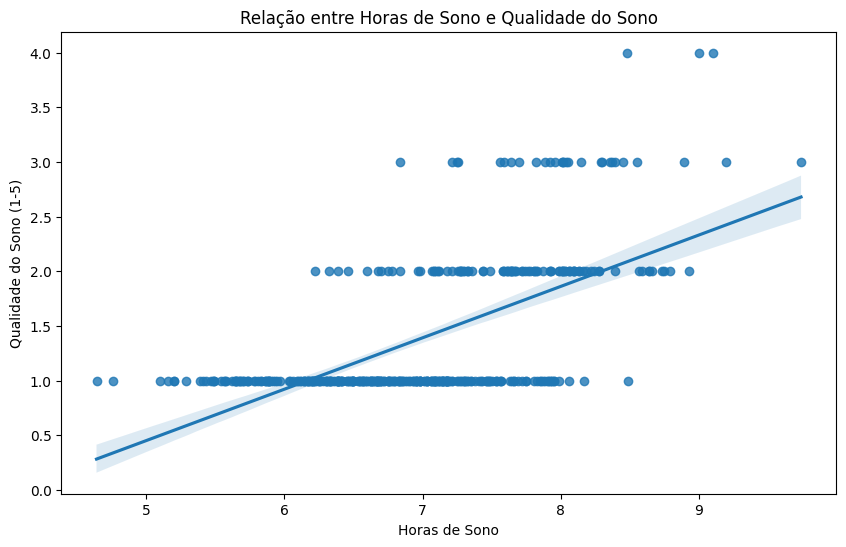

In [106]:
# Gráfico de dispersão: sleep_hours vs. sleep_quality_1_5
plt.figure(figsize=(10, 6))
sns.regplot(data=base, x='sleep_hours', y='sleep_quality_1_5')
plt.title('Relação entre Horas de Sono e Qualidade do Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Qualidade do Sono (1-5)')
plt.show()

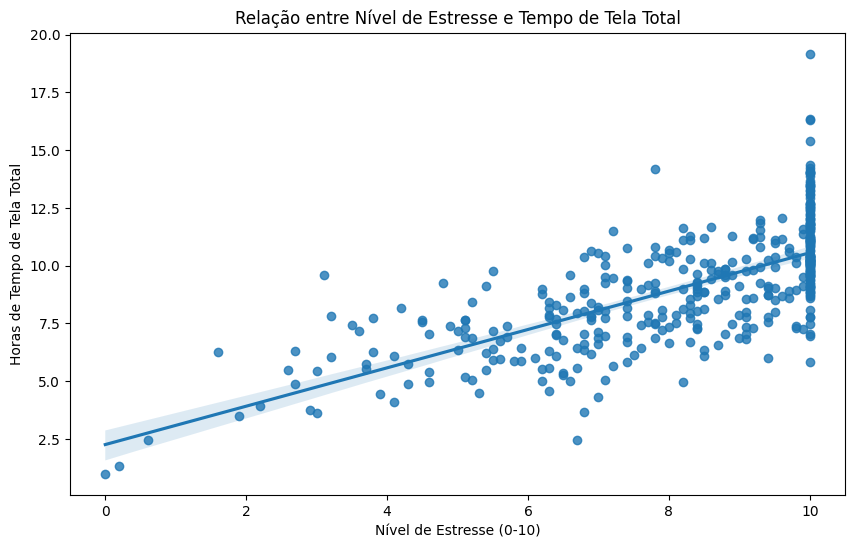

In [107]:
# Gráfico de dispersão: stress_level_0_10 vs. screen_time_hours
plt.figure(figsize=(10, 6))
sns.regplot(data=base, x='stress_level_0_10', y='screen_time_hours')
plt.title('Relação entre Nível de Estresse e Tempo de Tela Total')
plt.xlabel('Nível de Estresse (0-10)')
plt.ylabel('Horas de Tempo de Tela Total')
plt.show()

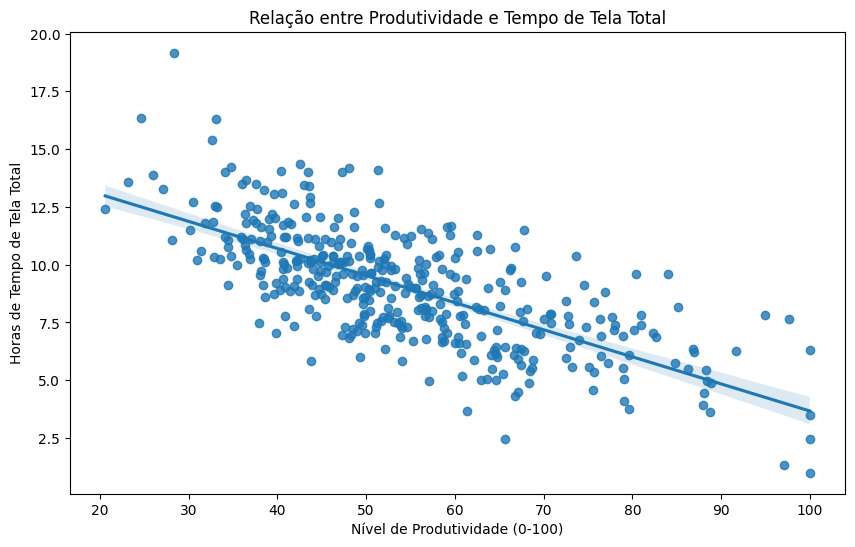

In [108]:
# Gráfico de dispersão: productivity_0_100 vs. screen_time_hours
plt.figure(figsize=(10, 6))
sns.regplot(data=base, x='productivity_0_100', y='screen_time_hours')
plt.title('Relação entre Produtividade e Tempo de Tela Total')
plt.xlabel('Nível de Produtividade (0-100)')
plt.ylabel('Horas de Tempo de Tela Total')
plt.show()

### **Insights obtidos através das variáveis numéricas**:


**Saúde Mental vs. Tempo de Tela Total/Trabalho/Lazer**: Estes gráficos mostram uma clara tendência negativa. À medida que o tempo de tela total, de trabalho ou de lazer aumenta, o índice de bem-estar mental tende a diminuir.

**Saúde Mental vs. Horas e Qualidade do Sono**: Quanto mais horas de sono e melhor a qualidade do sono, maior tende a ser o índice de bem-estar mental. A qualidade do sono parece ter uma relação mais forte e linear com o bem-estar mental do que as horas de sono.

**Saúde Mental vs. Nível de Estresse**: Fortíssima correlação negativa, quase linear. Níveis mais altos de estresse estão claramente associados a índices de bem-estar mental muito mais baixos.

**Saúde Mental vs. Produtividade**: Similar ao estresse, este gráfico mostra uma fortíssima correlação positiva. Níveis mais altos de produtividade estão fortemente associados a índices de bem-estar mental mais altos.

**Tempo de Tela Total vs. Tempo de Tela para Trabalho/Lazer**: Os gráficos mostram uma clara tendência positiva, indicando que quanto maior o tempo total de tela, maiores são os tempos dedicados tanto ao trabalho quanto ao lazer. No entanto, a dispersão sugere que essa proporção pode variar significativamente entre os indivíduos.

**Nível de Estresse vs. Produtividade**: Este gráfico reforça a forte correlação negativa já observada no heatmap. À medida que o nível de estresse aumenta, a produtividade tende a diminuir, e vice-versa. Os pontos formam uma nuvem com inclinação descendente.

**Horas de Sono vs. Qualidade do Sono**: O gráfico mostra uma relação positiva entre horas de sono e qualidade do sono. Pessoas que dormem mais horas tendem a relatar uma qualidade de sono melhor, embora a relação não seja perfeitamente linear e haja variação nos dados.

**Nível de Estresse vs. Tempo de Tela Total**: O gráfico sugere uma tendência positiva, onde níveis mais altos de estresse parecem estar associados a mais tempo de tela total. No entanto, a dispersão é considerável, indicando que outros fatores também influenciam essa relação.

**Produtividade vs. Tempo de Tela Total**: Este gráfico mostra uma tendência negativa. Pessoas com maior tempo de tela total tendem a apresentar menor produtividade, reforçando a correlação negativa já identificada.

## Respondendo as hipóteses

**Hipótese 1: O aumento do tempo de tela total está associado à diminuição do bem-estar mental.**
- **Validada**. A análise de correlação e os gráficos de dispersão mostram uma clara relação negativa entre o tempo total de tela e o índice de bem-estar mental. O aumento de um está diretamente ligado à diminuição do outro.

**Hipótese 2: O tempo de tela dedicado ao trabalho e ao lazer tem impactos diferentes no bem-estar mental.**
- **Validada**. As análises mostram que, embora ambos tenham uma relação negativa com o bem-estar mental, o tempo de tela dedicado ao lazer possui uma correlação negativa mais forte do que o tempo de tela para trabalho. Isso valida a ideia de que o impacto varia dependendo da finalidade do uso.

**Hipótese 3: O estresse e a produtividade são influenciados pelo tempo de tela, e essa relação varia entre diferentes ocupações e modalidades de trabalho.**
- **Validada**. A análise de correlação confirma que o tempo de tela influencia o estresse e a produtividade. Além disso, a análise por modalidade de trabalho revela que a relação de tempo de tela varia, com trabalhadores remotos apresentando um uso significativamente maior.

**Hipótese 4: A combinação de qualidade e quantidade de sono adequadas está positivamente associada ao aumento do bem-estar mental.**
- **Validada**. As análises demonstram uma forte correlação positiva entre as variáveis de sono (qualidade e quantidade de horas) e o bem-estar mental, confirmando que o sono é um fator fundamental para a saúde mental.



# Feature Engineering



### Codificação de Variáveis Categóricas

In [109]:
# Codificação One-Hot para 'gênero', 'modo de trabalho' e 'ocupação'
# Verificando as colunas do tipo 'object' no DataFrame
colunas_categoricas_restantes = base.select_dtypes(include='object').columns

if len(colunas_categoricas_restantes) > 0:
    base = pd.get_dummies(base, columns=colunas_categoricas_restantes, drop_first=True)
    print("Colunas categóricas codificadas:")
    print(colunas_categoricas_restantes)
else:
    print("Não há colunas categóricas (tipo 'object') restantes para codificar.")

# Exibindo as primeiras linhas para verificar as novas colunas codificadas
base.head()

Colunas categóricas codificadas:
Index(['gender', 'occupation', 'work_mode'], dtype='object')


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,gender_Male,gender_Non-binary/Other,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_In-person,work_mode_Remote
0,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,False,False,False,False,False,False,False,True
1,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,False,False,False,False,False,False,True,False
2,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,False,False,False,False,False,False,False,False
3,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,True,False,False,False,False,False,False,False
4,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,True,False,False,False,True,False,False,True


### Criação de Novas Features

Após a codificação das variáveis categóricas, foram criadas novas features para capturar relações e índices relevantes para a análise:

*   **`leisure_work_screen_ratio`**: Proporção entre tempo de tela para lazer e trabalho. Ajuda a entender se o uso da tela é mais para diversão ou atividades profissionais.
*   **`life_quality_index`**: Combina o nível de estresse e a qualidade do sono. Um índice maior indica menos estresse e melhor sono, sugerindo melhor qualidade de vida.
*   **`sleep_screen_ratio`**: Razão entre horas de sono e tempo total de tela. Mostra se a pessoa dorme mais ou usa mais telas.

In [110]:
# Criação da nova feature: Índice de Uso de Tela (Proporção Lazer/Trabalho)
# Adicionando 1 ao denominador para evitar divisão por zero
base['leisure_work_screen_ratio'] = base['leisure_screen_hours'] / (base['work_screen_hours'] + 1)

# Criação da nova feature: Índice de Qualidade de Vida (combinando estresse e qualidade do sono)
# Invertendo a escala de stress (10 - stress) para que valores mais altos representem menos estresse
base['life_quality_index'] = (10 - base['stress_level_0_10']) + base['sleep_quality_1_5']

# Criação da nova feature: Equilíbrio entre Sono e Tela (razão entre horas de sono e tempo total de tela)
# Adicionando 1 ao denominador para evitar divisão por zero
base['sleep_screen_ratio'] = base['sleep_hours'] / (base['screen_time_hours'] + 1)

# Exibindo as primeiras linhas para verificar as novas features criadas
base.head()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,...,gender_Non-binary/Other,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_In-person,work_mode_Remote,leisure_work_screen_ratio,life_quality_index,sleep_screen_ratio
0,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,...,False,False,False,False,False,False,True,0.830745,1.7,0.562341
1,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,...,False,False,False,False,False,True,False,5.131387,7.3,0.958333
2,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,...,False,False,False,False,False,False,False,4.157895,1.9,0.601113
3,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,...,False,False,False,False,False,False,False,6.775641,1.0,0.568013
4,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,...,False,False,False,True,False,False,True,1.793713,1.0,0.407173


In [111]:
# Criação de Features de Interação: screen_time_hours * work_mode
# Iterar sobre as colunas criadas pelo one-hot encoding para work_mode
work_mode_cols = [col for col in base.columns if col.startswith('work_mode_')]
for col in work_mode_cols:
    base[f'screen_time_{col}'] = base['screen_time_hours'] * base[col]

# Criação de Features de Interação: screen_time_hours * occupation
# Iterar sobre as colunas criadas pelo one-hot encoding para occupation
occupation_cols = [col for col in base.columns if col.startswith('occupation_')]
for col in occupation_cols:
     base[f'screen_time_{col}'] = base['screen_time_hours'] * base[col]

# Exibindo as primeiras linhas para verificar as novas colunas de interação
base.head()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,...,work_mode_Remote,leisure_work_screen_ratio,life_quality_index,sleep_screen_ratio,screen_time_work_mode_In-person,screen_time_work_mode_Remote,screen_time_occupation_Retired,screen_time_occupation_Self-employed,screen_time_occupation_Student,screen_time_occupation_Unemployed
0,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,...,True,0.830745,1.7,0.562341,0.0,10.79,0.0,0.0,0.00,0.0
1,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,...,False,5.131387,7.3,0.958333,7.4,0.00,0.0,0.0,0.00,0.0
2,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,...,False,4.157895,1.9,0.601113,0.0,0.00,0.0,0.0,0.00,0.0
3,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,...,False,6.775641,1.0,0.568013,0.0,0.00,0.0,0.0,0.00,0.0
4,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,...,True,1.793713,1.0,0.407173,0.0,13.22,0.0,0.0,13.22,0.0


### Transformação da Variável Alvo

A distribuição da variável alvo é assimétrica, com concentração em valores mais baixos. Tentarei aplicar uma transformação logarítmica para ver se melhora a simetria.

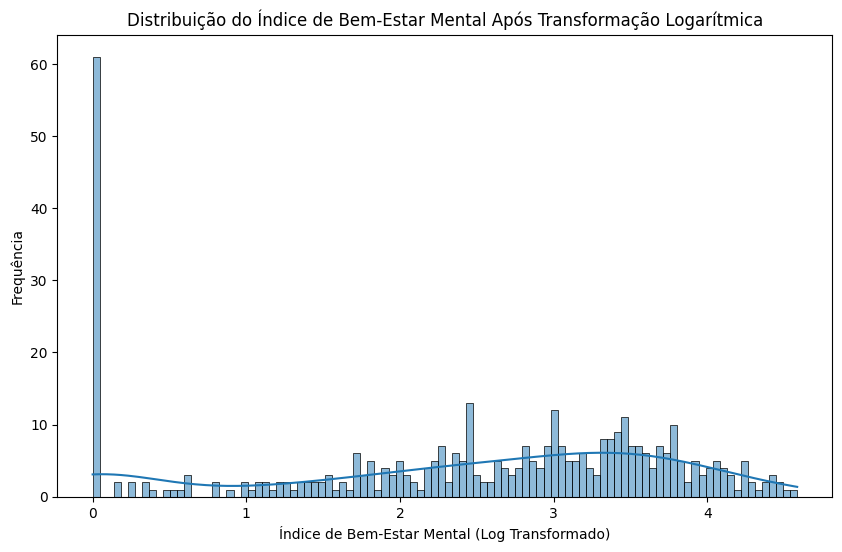

In [112]:
# Aplicando transformação logarítmica na variável alvo
# Adicionando 1 para lidar com valores zero antes da transformação logarítmica
base['mental_wellness_index_0_100_log'] = np.log1p(base['mental_wellness_index_0_100'])

# Visualizando a distribuição da variável alvo após a transformação logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='mental_wellness_index_0_100_log', kde=True, bins=100)
plt.title('Distribuição do Índice de Bem-Estar Mental Após Transformação Logarítmica')
plt.xlabel('Índice de Bem-Estar Mental (Log Transformado)')
plt.ylabel('Frequência')
plt.show()

A transformação logarítmica ajudou a reduzir a assimetria, mas a distribuição ainda não é perfeitamente simétrica.

### Padronização das Features

In [134]:
# Selecionando as colunas numéricas para padronização (excluindo a variável alvo original e transformada, e colunas booleanas criadas pelo one-hot encoding)
colunas_para_padronizar = base.select_dtypes(include=np.number).columns.drop(['mental_wellness_index_0_100', 'mental_wellness_index_0_100_log'])

# Identificando as colunas booleanas resultantes do one-hot encoding para excluí-las da padronização
boolean_cols = base.select_dtypes(include='bool').columns
colunas_para_padronizar = colunas_para_padronizar.difference(boolean_cols)

# Inicializando o StandardScaler
scaler = StandardScaler()

# Aplicando a padronização nas colunas selecionadas
base[colunas_para_padronizar] = scaler.fit_transform(base[colunas_para_padronizar])

# Exibindo as primeiras linhas para verificar as colunas padronizadas
base.head()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,...,leisure_work_screen_ratio,life_quality_index,sleep_screen_ratio,screen_time_work_mode_In-person,screen_time_work_mode_Remote,screen_time_occupation_Retired,screen_time_occupation_Self-employed,screen_time_occupation_Student,screen_time_occupation_Unemployed,mental_wellness_index_0_100_log
0,0.432159,0.709462,1.688484,-0.672563,-0.450077,-0.610101,0.549415,-0.640379,0.245854,-1.469361,...,-1.200270,-0.615094,-0.613714,-0.564144,1.391394,-0.179416,-0.342251,-0.583288,-0.257202,2.332144
1,-0.238375,-0.653110,-0.939950,0.084835,1.217853,2.459588,-1.171242,1.579433,-0.512161,-1.183850,...,1.218235,1.611491,0.576008,1.410138,-0.740133,-0.179416,-0.342251,-0.583288,-0.257202,4.046554
2,0.700373,0.303504,-0.566682,0.833218,-0.626267,-0.610101,0.453823,-0.167086,-0.612276,0.019374,...,0.670783,-0.535573,-0.497227,-0.564144,-0.740133,-0.179416,-0.342251,-0.583288,-0.257202,1.526056
3,1.639121,0.846121,-0.841449,1.680783,-0.144681,-0.610101,0.883988,-1.153669,-1.570521,-0.449680,...,2.142896,-0.893417,-0.596673,-0.564144,-0.740133,-0.179416,-0.342251,-0.583288,-0.257202,0.000000
4,-0.238375,1.686172,0.988605,1.031584,-1.436740,-0.610101,0.883988,-1.053678,0.474689,0.447640,...,-0.658736,-0.893417,-1.079902,-0.564144,1.871432,-0.179416,-0.342251,2.206333,-0.257202,0.000000


### Divisão em Treino e Teste

In [114]:
# Definindo as features (X) e o alvo (y)
# Podemos usar a variável alvo transformada (mental_wellness_index_0_100_log) para a modelagem
X = base.drop(['mental_wellness_index_0_100', 'mental_wellness_index_0_100_log'], axis=1)
y = base['mental_wellness_index_0_100_log']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape do conjunto de treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape do conjunto de teste (X_test, y_test):", X_test.shape, y_test.shape)

Shape do conjunto de treino (X_train, y_train): (320, 27) (320,)
Shape do conjunto de teste (X_test, y_test): (80, 27) (80,)


# Modelagem

Iremos testar 4 modelos de regressão com hiperparâmetros, e, posteriormente trazendo ensemble, visando o melhor resultado.

### 1. Regressão Linear

In [115]:
# Inicializando e treinando o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_linear = linear_model.predict(X_test)

# Avaliando o modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Avaliação do Modelo de Regressão Linear:")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"R-squared (R2): {r2_linear:.4f}")

Avaliação do Modelo de Regressão Linear:
Mean Squared Error (MSE): 0.4984
Root Mean Squared Error (RMSE): 0.7060
R-squared (R2): 0.6675


### 2. Árvore de Decisão para Regressão

In [116]:
# Definindo a grade de hiperparâmetros para a Árvore de Decisão
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Inicializando o modelo
tree_model = DecisionTreeRegressor()

# Configurando GridSearchCV
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree,
                                scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Executando a busca
grid_search_tree.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para Árvore de Decisão:", grid_search_tree.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", grid_search_tree.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree_tuned = best_tree_model.predict(X_test)

mse_tree_tuned = mean_squared_error(y_test, y_pred_tree_tuned)
rmse_tree_tuned = np.sqrt(mse_tree_tuned)
r2_tree_tuned = r2_score(y_test, y_pred_tree_tuned)

print("\nAvaliação do Modelo de Árvore de Decisão Tunado no Teste:")
print(f"Mean Squared Error (MSE): {mse_tree_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_tuned:.4f}")
print(f"R-squared (R2): {r2_tree_tuned:.4f}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Melhores hiperparâmetros para Árvore de Decisão: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}
Melhor MSE (negativo) na validação cruzada: -0.6612755674027694

Avaliação do Modelo de Árvore de Decisão Tunado no Teste:
Mean Squared Error (MSE): 0.6659
Root Mean Squared Error (RMSE): 0.8160
R-squared (R2): 0.5557


### 3. Random Forest para Regressão

In [117]:
# Definindo a grade de hiperparâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

# Inicializando o modelo
rf_model = RandomForestRegressor()

# Configurando GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                                scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Executando a busca
grid_search_rf.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para Random Forest:", grid_search_rf.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", grid_search_rf.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nAvaliação do Modelo Random Forest Tunado no Teste:")
print(f"Mean Squared Error (MSE): {mse_rf_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.4f}")
print(f"R-squared (R2): {r2_rf_tuned:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores hiperparâmetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Melhor MSE (negativo) na validação cruzada: -0.4936400588762645

Avaliação do Modelo Random Forest Tunado no Teste:
Mean Squared Error (MSE): 0.4177
Root Mean Squared Error (RMSE): 0.6463
R-squared (R2): 0.7213


### 4. XGBoost para Regressão

In [118]:
# Definindo a grade de hiperparâmetros para XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'random_state': [42]
}

# Inicializando o modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Configurando GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                                 scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Executando a busca
grid_search_xgb.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para XGBoost:", grid_search_xgb.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", grid_search_xgb.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print("\nAvaliação do Modelo XGBoost Tunado no Teste:")
print(f"Mean Squared Error (MSE): {mse_xgb_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.4f}")
print(f"R-squared (R2): {r2_xgb_tuned:.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores hiperparâmetros para XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'subsample': 0.8}
Melhor MSE (negativo) na validação cruzada: -0.4740435820193866

Avaliação do Modelo XGBoost Tunado no Teste:
Mean Squared Error (MSE): 0.4191
Root Mean Squared Error (RMSE): 0.6474
R-squared (R2): 0.7204


## Otimização de Hiperparâmetros com RandomizedSearchCV

Agora, vamos realizar a busca por hiperparâmetros utilizando `RandomizedSearchCV` para comparar os resultados com a busca exaustiva.

### 1. Otimização para Regressão Linear (Random Search)

In [130]:
# Definindo distribuições de hiperparâmetros para RandomizedSearchCV

# Regressão Linear (ainda sem muitos hiperparâmetros para busca aleatória, mas mantendo a estrutura)
param_dist_linear = {} # Dicionário vazio ou com distribuições simples se aplicável

# Inicializando o modelo
linear_model = LinearRegression()

# Configurando RandomizedSearchCV
# n_iter: número de iterações (ajustar conforme o tempo disponível e tamanho do espaço de busca)
# Usando um número pequeno de iterações para Linear Regression, já que param_dist é vazio
random_search_linear = RandomizedSearchCV(estimator=linear_model, param_distributions=param_dist_linear,
                                          scoring='neg_mean_squared_error', cv=5, n_iter=1, n_jobs=-1, verbose=1, random_state=42)

# Executando a busca
random_search_linear.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para Regressão Linear (Random Search):", random_search_linear.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", random_search_linear.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_linear_model_rs = random_search_linear.best_estimator_
y_pred_linear_rs = best_linear_model_rs.predict(X_test)

mse_linear_rs = mean_squared_error(y_test, y_pred_linear_rs)
rmse_linear_rs = np.sqrt(mse_linear_rs)
r2_linear_rs = r2_score(y_test, y_pred_linear_rs)

print("\nAvaliação do Modelo de Regressão Linear (Random Search) no Teste:")
print(f"Mean Squared Error (MSE): {mse_linear_rs:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear_rs:.4f}")
print(f"R-squared (R2): {r2_linear_rs:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores hiperparâmetros para Regressão Linear (Random Search): {}
Melhor MSE (negativo) na validação cruzada: -0.7594894620579868

Avaliação do Modelo de Regressão Linear (Random Search) no Teste:
Mean Squared Error (MSE): 0.4984
Root Mean Squared Error (RMSE): 0.7060
R-squared (R2): 0.6675


### 2. Otimização para Árvore de Decisão para Regressão (Random Search)

In [120]:
# Definindo distribuições de hiperparâmetros para a Árvore de Decisão
param_dist_tree = {
    'max_depth': randint(low=1, high=20), # Distribuição inteira para profundidade máxima
    'min_samples_split': randint(low=2, high=20), # Distribuição inteira para min_samples_split
    'min_samples_leaf': randint(low=1, high=10), # Distribuição inteira para min_samples_leaf
    'random_state': [42]
}

# Inicializando o modelo
tree_model = DecisionTreeRegressor()

# Configurando RandomizedSearchCV
random_search_tree = RandomizedSearchCV(estimator=tree_model, param_distributions=param_dist_tree,
                                        scoring='neg_mean_squared_error', cv=5, n_iter=50, n_jobs=-1, verbose=1, random_state=42) # Ajustando n_iter para um valor razoável

# Executando a busca
random_search_tree.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para Árvore de Decisão (Random Search):", random_search_tree.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", random_search_tree.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_tree_model_rs = random_search_tree.best_estimator_
y_pred_tree_rs = best_tree_model_rs.predict(X_test)

mse_tree_rs = mean_squared_error(y_test, y_pred_tree_rs)
rmse_tree_rs = np.sqrt(mse_tree_rs)
r2_tree_rs = r2_score(y_test, y_pred_tree_rs)

print("\nAvaliação do Modelo de Árvore de Decisão (Random Search) no Teste:")
print(f"Mean Squared Error (MSE): {mse_tree_rs:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree_rs:.4f}")
print(f"R-squared (R2): {r2_tree_rs:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores hiperparâmetros para Árvore de Decisão (Random Search): {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 4, 'random_state': 42}
Melhor MSE (negativo) na validação cruzada: -0.5172213008829686

Avaliação do Modelo de Árvore de Decisão (Random Search) no Teste:
Mean Squared Error (MSE): 0.5471
Root Mean Squared Error (RMSE): 0.7397
R-squared (R2): 0.6350


### 3. Otimização para Random Forest para Regressão (Random Search)

In [121]:
# Definindo distribuições de hiperparâmetros para Random Forest
param_dist_rf = {
    'n_estimators': randint(low=50, high=500), # Distribuição inteira para número de estimadores
    'max_depth': [None] + randint(low=5, high=30).rvs(20).tolist(), # None ou distribuição inteira (aumentando range e amostras)
    'min_samples_split': randint(low=2, high=30), # Aumentando range
    'min_samples_leaf': randint(low=1, high=15), # Aumentando range
    'bootstrap': [True, False], # Se amostras bootstrap são usadas
    'random_state': [42]
}

# Inicializando o modelo
rf_model = RandomForestRegressor()

# Configurando RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      scoring='neg_mean_squared_error', cv=5, n_iter=100, n_jobs=-1, verbose=1, random_state=42) # Aumentando n_iter

# Executando a busca
random_search_rf.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para Random Forest (Random Search):", random_search_rf.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", random_search_rf.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_rf_model_rs = random_search_rf.best_estimator_
y_pred_rf_rs = best_rf_model_rs.predict(X_test)

mse_rf_rs = mean_squared_error(y_test, y_pred_rf_rs)
rmse_rf_rs = np.sqrt(mse_rf_rs)
r2_rf_rs = r2_score(y_test, y_pred_rf_rs)

print("\nAvaliação do Modelo Random Forest (Random Search) no Teste:")
print(f"Mean Squared Error (MSE): {mse_rf_rs:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_rs:.4f}")
print(f"R-squared (R2): {r2_rf_rs:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparâmetros para Random Forest (Random Search): {'bootstrap': True, 'max_depth': 23, 'min_samples_leaf': 10, 'min_samples_split': 11, 'n_estimators': 429, 'random_state': 42}
Melhor MSE (negativo) na validação cruzada: -0.46754829114738794

Avaliação do Modelo Random Forest (Random Search) no Teste:
Mean Squared Error (MSE): 0.4078
Root Mean Squared Error (RMSE): 0.6386
R-squared (R2): 0.7279


### 4. Otimização para XGBoost para Regressão (Random Search)

In [122]:
# Definindo distribuições de hiperparâmetros para XGBoost
param_dist_xgb = {
    'n_estimators': randint(low=100, high=1000), # Aumentando range
    'learning_rate': uniform(loc=0.001, scale=0.3), # Ajustando range e escala
    'max_depth': randint(low=3, high=15), # Aumentando range
    'subsample': uniform(loc=0.6, scale=0.4),
    'colsample_bytree': uniform(loc=0.6, scale=0.4),
    'gamma': uniform(loc=0, scale=1), # Adicionando gamma
    'lambda': uniform(loc=0, scale=2), # L2 regularization (aumentando scale)
    'alpha': uniform(loc=0, scale=2), # L1 regularization (aumentando scale)
    'min_child_weight': randint(low=1, high=10), # Adicionando min_child_weight
    'random_state': [42]
}

# Inicializando o modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Configurando RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       scoring='neg_mean_squared_error', cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42) # Aumentando n_iter

# Executando a busca
random_search_xgb.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a melhor pontuação
print("Melhores hiperparâmetros para XGBoost (Random Search):", random_search_xgb.best_params_)
print("Melhor MSE (negativo) na validação cruzada:", random_search_xgb.best_score_)

# Avaliando o melhor modelo no conjunto de teste
best_xgb_model_rs = random_search_xgb.best_estimator_
y_pred_xgb_rs = best_xgb_model_rs.predict(X_test)

mse_xgb_rs = mean_squared_error(y_test, y_pred_xgb_rs)
rmse_xgb_rs = np.sqrt(mse_xgb_rs)
r2_xgb_rs = r2_score(y_test, y_pred_xgb_rs)

print("\nAvaliação do Modelo XGBoost (Random Search) no Teste:")
print(f"Mean Squared Error (MSE): {mse_xgb_rs:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_rs:.4f}")
print(f"R-squared (R2): {r2_xgb_rs:.4f}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Melhores hiperparâmetros para XGBoost (Random Search): {'alpha': np.float64(1.2558007789818155), 'colsample_bytree': np.float64(0.6327036127795488), 'gamma': np.float64(0.8735786241067772), 'lambda': np.float64(1.8417448010636264), 'learning_rate': np.float64(0.019323387956459125), 'max_depth': 12, 'min_child_weight': 4, 'n_estimators': 356, 'random_state': 42, 'subsample': np.float64(0.6338068030722728)}
Melhor MSE (negativo) na validação cruzada: -0.4591512959778806

Avaliação do Modelo XGBoost (Random Search) no Teste:
Mean Squared Error (MSE): 0.4304
Root Mean Squared Error (RMSE): 0.6560
R-squared (R2): 0.7128


Agora vamos identificar a importância de cada feature para os dois principais modelos obtidos.

/tmp/ipython-input-3011881084.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_xgb.head(15), palette='viridis')
/tmp/ipython-input-3011881084.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_rf.head(15), palette='viridis')


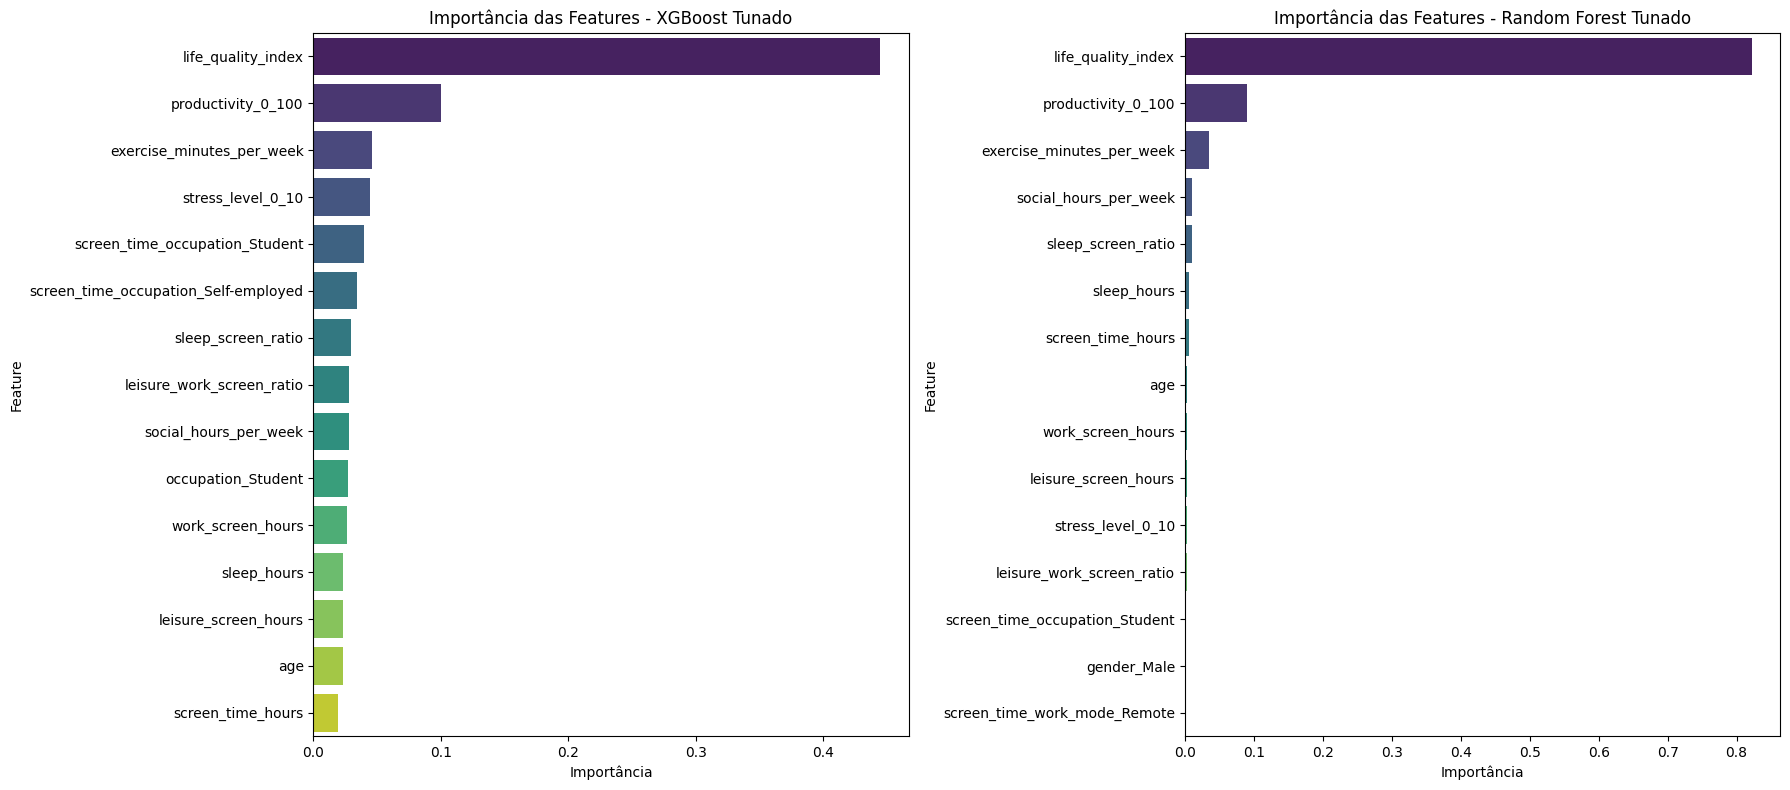

In [123]:
# Criando DataFrames para a importância das features
feat_imp_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model_rs.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizando a importância das features lado a lado
plt.figure(figsize=(18, 8))

# Gráfico para XGBoost
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feat_imp_xgb.head(15), palette='viridis')
plt.title('Importância das Features - XGBoost Tunado')
plt.xlabel('Importância')
plt.ylabel('Feature')

# Gráfico para Random Forest
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feat_imp_rf.head(15), palette='viridis')
plt.title('Importância das Features - Random Forest Tunado')
plt.xlabel('Importância')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

## Criação de Ensemble

Criando um modelo ensemble utilizando VotingRegressor para combinar as previsões dos melhores modelos que treinamos.

In [124]:
# Utilizando os melhores estimadores encontrados nas buscas por hiperparâmetros
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf_model_rs),
    ('xgb', best_xgb_model)
])

# Treinando o modelo ensemble
ensemble_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_ensemble = ensemble_model.predict(X_test)

# Avaliando o modelo ensemble
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Avaliação do Modelo Ensemble (Voting Regressor):")
print(f"Mean Squared Error (MSE): {mse_ensemble:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ensemble:.4f}")
print(f"R-squared (R2): {r2_ensemble:.4f}")

Avaliação do Modelo Ensemble (Voting Regressor):
Mean Squared Error (MSE): 0.4007
Root Mean Squared Error (RMSE): 0.6330
R-squared (R2): 0.7327


## Explicação das Métricas de Avaliação

*   Mean Squared Error (**MSE**): Erro Quadrático Médio. Mede a média dos quadrados dos erros entre os valores reais e as previsões. Um **valor menor** indica um melhor ajuste do modelo aos dados.
*   Root Mean Squared Error (**RMSE**): Raiz do Erro Quadrático Médio. É a raiz quadrada do MSE. Possui a mesma unidade da variável alvo, tornando-o mais interpretável que o MSE. Um **valor menor** indica um melhor desempenho.
*   R-squared (**R²**): Coeficiente de Determinação. Representa a proporção da variância na variável alvo que é previsível a partir das features. Varia de 0 a 1. Um **valor mais próximo de 1** indica que o modelo explica uma maior parte da variância dos dados, ou seja, se ajusta melhor.

In [125]:
# Criando um DataFrame para comparar os resultados dos modelos
resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'XGBoost', 'Ensemble'],
    'MSE': [mse_linear_rs, mse_tree_rs, mse_rf_rs, mse_xgb_tuned, mse_ensemble],
    'RMSE': [rmse_linear_rs, rmse_tree_rs, rmse_rf_rs, rmse_xgb_tuned, rmse_ensemble],
    'R²': [r2_linear_rs, r2_tree_rs, r2_rf_rs, r2_xgb_tuned, r2_ensemble]
})

# Exibindo a tabela de resultados
resultados

,Modelo,MSE,RMSE,R²
0,Regressão Linear,0.498396,0.705972,0.667467
1,Árvore de Decisão,0.547122,0.739677,0.634957
2,Random Forest,0.407750,0.638553,0.727947
3,XGBoost,0.419099,0.647378,0.720375
4,Ensemble,0.400673,0.632987,0.732669


In [133]:
from sklearn.metrics import mean_absolute_error

# Avaliando os modelos na escala original da variável alvo
# Revertemos a transformação logarítmica para avaliar o desempenho dos modelos na escala original do índice de bem-estar mental.
# Isso torna as métricas mais interpretáveis no contexto do problema original.

def invert_log(y_log):
    # np.expm1 reverte a transformação logarítmica (np.log1p)
    return np.expm1(y_log)

# Incluindo todos os modelos treinados (utilizando os melhores tunados)
# Substituindo o linear_model pela melhor instância treinada do RandomizedSearchCV
models = {
    'Regressão Linear': random_search_linear.best_estimator_,
    'Árvore de Decisão': best_tree_model,
    'RandomForest': best_rf_model_rs,
    'XGBoost': best_xgb_model,
    'Ensemble': ensemble_model
}

results_original = []
for name, m in models.items():
    y_pred_log = m.predict(X_test)
    y_pred = invert_log(y_pred_log)
    y_true = invert_log(y_test)
    results_original.append({
        'Modelo': name,
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    })

pd.DataFrame(results_original)

,Modelo,MAE,RMSE,R2
0,Regressão Linear,12.279430,23.207986,-0.361771
1,Árvore de Decisão,5.946421,7.696864,0.850219
2,RandomForest,4.819668,6.109299,0.905635
3,XGBoost,5.273312,6.780747,0.883752
4,Ensemble,4.927294,6.234331,0.901733


### Transformação da Variável Alvo e Desempenho dos Modelos (Escala Original)

Para melhorar a previsão, a Variável Alvo foi ajustada por meio de uma transformação logarítmica. Isso foi feito porque os dados originais estavam distorcidos.
Porém a avaliação final foi feita na escala original, garantindo que o resultado seja prático e fácil de entender.

**Desempenho:**

*   **Regressão Linear:** Fraco (R² negativo).
*   **Modelos Baseados em Árvores** (Árvore de Decisão, Random Forest, XGBoost) e **Ensemble**: Tiveram desempenho significativamente superior.
*   **Random Forest Tunado**: Apresentou o melhor desempenho geral na escala final, alcançando um R2 de 0.905. É importante notar que este resultado reverteu a situação anterior, pois, durante a fase com a transformação logarítmica, o XGBoost Tunado havia se destacado.

## Soluções para o problema e melhora da saúde mental

1. Gerenciamento de tempo e carga de trabalho: Utilização da Técnica Pomodoro para estabelecer pausas obrigatórias e focadas, visando reduzir o estresse e o tempo de tela desnecessário, mantendo a produtividade.

2. Hobbies e Lazer: Incentivo à busca por hobbies e atividades de lazer fora do mundo digital, com o objetivo de aumentar a frequência de exercícios por semana e promover a redução do estresse.

3. Higiene do Sono: Busca e aplicação de conhecimentos para desenvolver uma rotina de sono consistente. Exemplos: leitura de livros, pausa das telas 30 minutos antes de dormir e o uso de técnicas de respiração para relaxamento.

4. Fortalecimento Social: Priorização e dedicação de tempo à interação social de qualidade, um fator crucial para a resiliência e bem-estar mental. Exemplo: agendar encontros semanais presenciais ou virtuais com amigos/família, dedicando o tempo de lazer à conexão humana em vez do uso solitário de telas.

5. Detox Digital: Focar em desligar as distrações e simplificar o ambiente digital do dia a dia. Exemplo: desativar notificações não essenciais e remover ou esconder aplicativos que geram uso excessivo da tela, perdendo a ansiedade por algo novo.

## Principais conclusões

A partir da análise final, é possível identificar que o alto nível de estresse (stress_level_0_10) e a baixa qualidade do sono (sleep_quality_1_5) são os principais fatores de risco que impactam negativamente no bem-estar mental (mental_wellness_index_0_100), e que o tempo de tela (screen_time_hours) é um fator secundário altamente correlacionado, principalmente pelo tempo gasto no lazer.

1. O **Aumento do Tempo de Tela Total Afeta Negativamente o Bem-Estar Mental**: A análise de correlação valida a ideia inicial do projeto, demonstrando uma relação clara e negativa entre as horas totais de uso de tela e o índice de bem-estar mental. Isso sugere que o aumento do tempo de tela geral está associado a uma diminuição da saúde mental.

2. **A Qualidade do Sono é Fundamental para a Saúde Mental**: A análise de correlação mostrou que a qualidade do sono e as horas dormidas estão fortemente ligadas a um maior bem-estar mental e a uma redução significativa nos níveis de estresse.

3. **O Objetivo do Uso da Tela Faz Diferença**: Há uma descoberta crucial que aponta que o tempo de tela para lazer tem uma correlação negativa com o bem-estar mental mais forte do que o tempo de tela para trabalho. Isso sugere que o tipo de conteúdo consumido é mais importante do que a quantidade total de tempo de tela.

4. **Produtividade e Tempo de Tela para Trabalho se Correlacionam Positivamente**: Ao contrário do uso para lazer, o tempo de tela para trabalho tem uma correlação positiva com a produtividade, indicando que o uso de dispositivos para fins profissionais não tem o mesmo efeito negativo.

5. **A Modalidade de Trabalho é um Fator de Diferença no Tempo de Tela**: A análise das distribuições revelou que trabalhadores em regime remoto apresentam um tempo de tela, tanto total quanto para trabalho, significativamente maior do que os trabalhadores em regime presencial ou híbrido.


